<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Mice Protein Expression Dataset: Clustering
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2022</b> <br>
    Paola Maragno <br>
    <a href="mailto:paola.maragno@mail.polimi.it">paola.maragno@mail.polimi.it</a><br>
    </div>
    </td>
</tr>
</table>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
    
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
np.random.seed(0)

# Data loading and preprocessing

The dataset contains the expression levels of 77 proteins in subcellular fractions in brain regions of eight classes of mice:

- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

Memantine has been proposed for treatment of learning deficits in DS.
Mice are stimulated to learn exposing them to context fear conditioning, a task commonly used to assess associative learning.

15 measurements of each protein have been made per sample. Therefore, for control mice, there were 38x15, or 570 measurements, and for trisomic mice, there were 34x15, or a total of 510 measurements, per protein.

The detected learning outcome for the eight classes of mice is the following:

- control mice stimulated to learn either injected with saline or memantine (c-CS-s and c-CS-m) show a normal learing outcome;
- trisomic mice stimulated to learn injected with saline (t-CS-s) fail in learing;
- learing is rescued in trisomic mice stimulated to learn injected with memantine (t-CS-m);
- control mice not stimulated to learn either injected with saline or memantine (c-SC-s and c-SC-m) and also trisomic mice not stimulated to learn either injected with saline or memantine (t-SC-s and t-SC-m) have no learning ability.

From these observed learning outcomes I expect that c-CS-s and c-CS-m mice can't be distinguished depending on their protein expression profile, since they both show normal learning.
At the same time c-SC-s, c-SC-m, t-SC-s and t-SC-m have no learning ability and so probably they don't differ so much for protein expression and so maybe they are not so easy to be clustered apart.
Contrarily, t-CS-m mice that show a rescued learning ability have probably a very different expression profile than t-CS-s and this may allow to discriminate among them.

In [2]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

In [3]:
# check the presence of missing values

df.isna().sum().sum()

1396

There are 1396 overall missing values in the dataset: the article suggests to replace the missing values with the average expression level of that protein in mice of the same class.

Since one mouse has missing values for the majority of proteins and values that are very different from other mice of its same class, the authors considered this mouse an outlier and excluded it from further analysis.

In [4]:
# find the mouse with the maximum number of missing values

np.max(df.isna().sum(axis=1)) 
# 43

df.index[df.isna().sum(axis=1) == np.max(df.isna().sum(axis=1))] 

Int64Index([987, 988, 989], dtype='int64')

I found three MouseIDs with 43 missing values: they are replicated measurments for the same mouse.

In [5]:
pd.concat([df[df.index == 987],df[df.index == 988], df[df.index == 989]])

MouseID  DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  NR2A_N  pAKT_N  pBRAF_N  \
987  3426_13       NaN      NaN     NaN    NaN     NaN     NaN      NaN   
988  3426_14       NaN      NaN     NaN    NaN     NaN     NaN      NaN   
989  3426_15       NaN      NaN     NaN    NaN     NaN     NaN      NaN   

     pCAMKII_N  pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  \
987        NaN      NaN  ...  0.112854  0.405540   0.151693  0.163125   
988        NaN      NaN  ...  0.120664  0.422986   0.175044  0.185038   
989        NaN      NaN  ...  0.098278  0.427405   0.172209  0.200861   

     H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
987  0.208852  1.443353    Ts65Dn     Saline       S/C  t-SC-s  
988  0.195326  1.443269    Ts65Dn     Saline       S/C  t-SC-s  
989  0.233076  1.495249    Ts65Dn     Saline       S/C  t-SC-s  

[3 rows x 82 columns]

In [6]:
# as suggested by the article, I remove these three rows from the dataset

df = df.drop([987, 988, 989])
df = df.reset_index(drop=True)

In [7]:
# check whether the number of rows is decreased of three units 

df.shape

(1077, 82)

Clustering is an unsupervised learing technique which divides the data instances (each described by a set of features) into groups based on similarities in these features.
In this case the clustering will cluster together the mice according to the similarity of their expression profile of the 77 proteins that were measured. 
Thus, being the expression values the only important information to perform clustering, I remove from the dataset the unnecessary columns: the mousedID and also the genotype, treatment and behavior since these information are all summerized by the class identification.

In [8]:
df = df.drop(['MouseID','Genotype','Treatment','Behavior'], axis=1)

In [9]:
columns =  df.columns.tolist()
columns.remove('class')

In [10]:
# The article suggests to replace the missing values with the average expression of that protein in mice of the same 
# class

# first of all I compute for each class of mice the average expression value of each protein
l = []
for cl in set(df['class']):
    df_cl = df[df['class'] == cl].drop(['class'],axis=1)
    d = dict()
    for prot in columns:
        non_nan_values = df_cl[prot][~np.isnan(df_cl[prot])]
        d[prot] = np.mean(non_nan_values)
    l.append((cl, d))

# Then, for each mouse, I replace each missing value with the average expression value of that protein in the class
# to which the mouse belongs 
for i in range(0,df.shape[0]):
    for j in range(0, df.shape[1]-1):
        if pd.isnull(df.iloc[i,j]):
            for ll in l:
                if ll[0] == df.iloc[i,-1]:
                    df.iloc[i,j] = ll[1][columns[j]]

In [11]:
# check the presence of missing values

df.isna().sum().sum()

0

I convert the vector of character classes with a numeric vector to make the further analysis easier:

- c-CS-m -> 0
- c-CS-s -> 1
- c-SC-m -> 2
- c-SC-s -> 3
- t-CS-m -> 4
- t-CS-s -> 5
- t-SC-m -> 6
- t-SC-s -> 7

In [12]:
df['class'] = df['class'].replace(['c-CS-m', 'c-CS-s' ,'c-SC-m' ,'c-SC-s' ,'t-CS-m' ,'t-CS-s', 't-SC-m', 't-SC-s'],range(8))

# Data visualization

In [13]:
df.describe().T

count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1077.0  0.425810  0.249362  0.145327  0.288121  0.366378  0.487711   
ITSN1_N    1077.0  0.617102  0.251640  0.245359  0.473361  0.565782  0.698032   
BDNF_N     1077.0  0.319088  0.049383  0.115181  0.287444  0.316564  0.348197   
NR1_N      1077.0  2.297269  0.347293  1.330831  2.057411  2.296546  2.528481   
NR2A_N     1077.0  3.843934  0.933100  1.737540  3.155678  3.760855  4.440011   
...           ...       ...       ...       ...       ...       ...       ...   
H3AcK18_N  1077.0  0.171261  0.056373  0.079691  0.133888  0.158180  0.201132   
EGR1_N     1077.0  0.183559  0.037497  0.105537  0.158174  0.174914  0.203338   
H3MeK4_N   1077.0  0.204851  0.050123  0.101787  0.172007  0.193425  0.230607   
CaNA_N     1077.0  1.337442  0.317499  0.586479  1.081231  1.316591  1.585916   
class      1077.0  3.378830  2.315183  0.000000  1.000000  3.000000  5.000000   

                max  
DYRK1A_N   2.516367  
ITSN1_N    2.602662  
BDNF_N     0.497160  
NR1_N      3.757641  
NR2A_N     8.482553  
...             ...  
H3AcK18_N  0.479763  
EGR1_N     0.360692  
H3MeK4_N   0.413903  
CaNA_N     2.129791  
class      7.000000  

[78 rows x 8 columns]

Text(0.5, 1.0, 'mean and max value of expression of each protein across all mice')

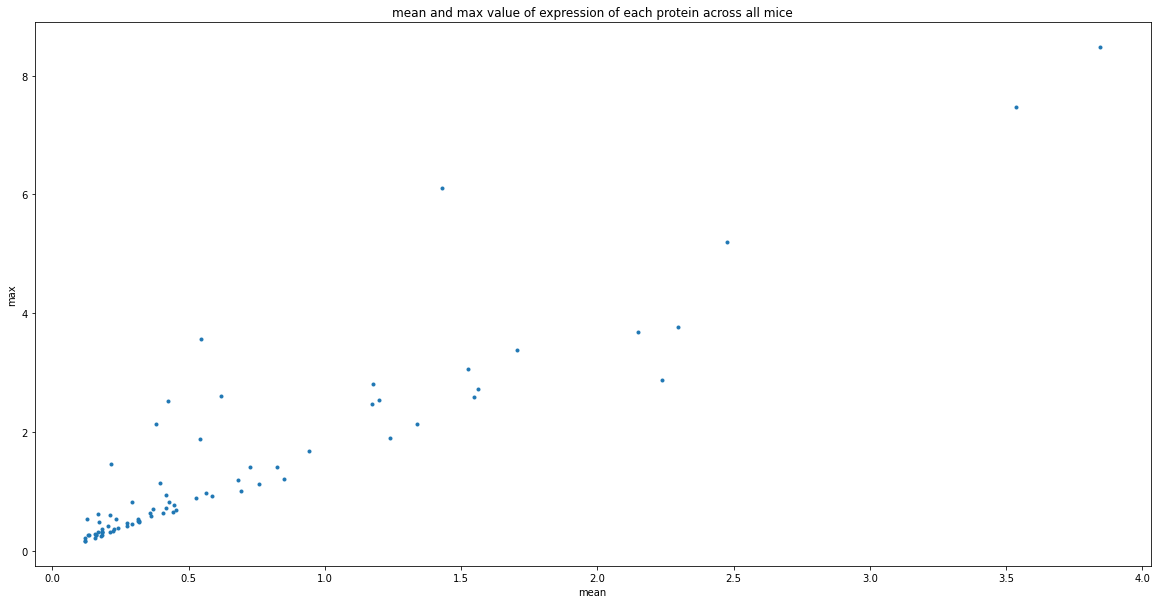

In [14]:
means = [np.mean(df[col]) for col in columns]
maxs = [np.max(df[col]) for col in columns]

plt.rcParams["figure.figsize"] = 20,10
plt.scatter(means, maxs, marker = '.')
plt.xlabel('mean')
plt.ylabel('max')
plt.title('mean and max value of expression of each protein across all mice')

As can be seen from the scatterplot the majority of proteins have a mean expression value across all the mice that is between 0 and 1, but there are also some proteins with mean value around 1.5 and 2.5 and even some around 3.5 and 4.
Also the maximum value of expression of one protein is very variable, going from very low values around 0 to 8.
The proteins with higher values would have more influence on the clustering outcome, possibly leading to erroneous results. Thus all measurements are normalized to the range 0–1, column by column, since from the plot we can see that most of the proteins have a mean expression across mice around 0 and 1.

I use minmax_scale function to normalize the protein expression values since it allows to choose the range of values in which normalizing your data.

In [15]:
from sklearn.preprocessing import minmax_scale

for col in columns:
    df[[col]] = minmax_scale(df[[col]], feature_range=(0, 1))

In [16]:
df.describe().T

count      mean       std  min       25%       50%       75%  max
DYRK1A_N   1077.0  0.118296  0.105170  0.0  0.060224  0.093230  0.144403  1.0
ITSN1_N    1077.0  0.157699  0.106749  0.0  0.096722  0.135928  0.192030  1.0
BDNF_N     1077.0  0.533818  0.129282  0.0  0.450975  0.527210  0.610024  1.0
NR1_N      1077.0  0.398234  0.143107  0.0  0.299397  0.397936  0.493508  1.0
NR2A_N     1077.0  0.312289  0.138339  0.0  0.210250  0.299972  0.400662  1.0
...           ...       ...       ...  ...       ...       ...       ...  ...
H3AcK18_N  1077.0  0.228885  0.140907  0.0  0.135468  0.196188  0.303549  1.0
EGR1_N     1077.0  0.305783  0.146959  0.0  0.206295  0.271901  0.383298  1.0
H3MeK4_N   1077.0  0.330212  0.160591  0.0  0.224982  0.293601  0.412732  1.0
CaNA_N     1077.0  0.486592  0.205726  0.0  0.320578  0.473081  0.647592  1.0
class      1077.0  3.378830  2.315183  0.0  1.000000  3.000000  5.000000  7.0

[78 rows x 8 columns]

We can see that the minimum expression value of each protein is 0 and the maximum one is 1.

In [17]:
# print how many mice per class are present in the dataset

for cl in set(df['class']):
    df_cl = df[df['class'] == cl]
    print(f'There are {df_cl.shape[0]} mice belonging to class {cl}')

There are 150 mice belonging to class 0
There are 135 mice belonging to class 1
There are 150 mice belonging to class 2
There are 135 mice belonging to class 3
There are 135 mice belonging to class 4
There are 105 mice belonging to class 5
There are 135 mice belonging to class 6
There are 132 mice belonging to class 7


# Data Visualization - Dimensionality reduction

PCA is not directly linked to clustering but, together with t-SNE, it is usefull to address a clustering problem.
In fact, we can try to have a first idea of how samples are organized by visualizing how they are distributed in the space. In order to do that, we have to reduce the number of features and we can do it by using PCA.

PCA uses the concept of ranking of a matrix to trasform a matrix and obtain a diagonal matrix: once you have a diagonal matrix it identifies the eigenvalues of the most important directions of your data, the PCs, so the components that explain the greatest variance in your data.

In [18]:
# extract the expression values of all the protein in all the mice
X = df.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (1077, 77)
y shape = (1077,)


In [19]:
from sklearn.decomposition import PCA

# PCA transforms the data by reducing its dimensionality in 3 components
pca = PCA(n_components=3)

# We consider each item as a simple vector of 77 features
X=X.reshape(-1, 77)
X_prj=pca.fit_transform(X)
# we fit and trasform the data all in once

# Reduce features dimensionality, just for visualization purpuses
X_prj.shape

(1077, 3)

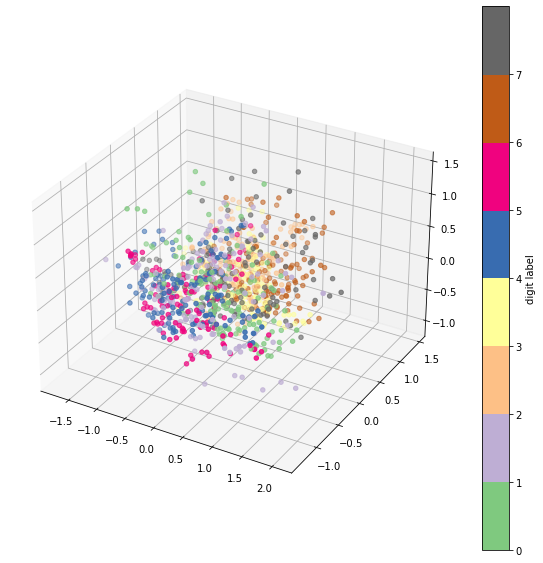

In [20]:
# this function takes the dataset, uses PCA do reduce the dimensionality and plot the data along these dimensions

import matplotlib 

def plot3d(X, labels):
    #%matplotlib inline
    #%matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    # We consire items as simple vectors of 77 features
    X = X.reshape(-1, X.shape[1])
    # Reduce features dimensionality, just for visualization purpuses
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    labels = labels.copy()
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("Accent").colors[8 - nlabels:])
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[: ,2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(min(labels), max(labels)+1))
    
plot3d(X, labels=y)

Looking at the graph we can see that:

- Points of the same cluster, so mice of the same class, are not well closely aggregated but they are quite spread;
- Different classes/clusters are not well separated in fact some points of different classes are closer between each others than points of the same class. 

From this visualization we expect to not be able to well clustering all the eigth classes of mice, in fact even the article points out that clustering using all eight groups of control and trisomic mice failed to produce a result with any clear cluster. 
As suggested by the article is better to reduce the number of input classes.

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


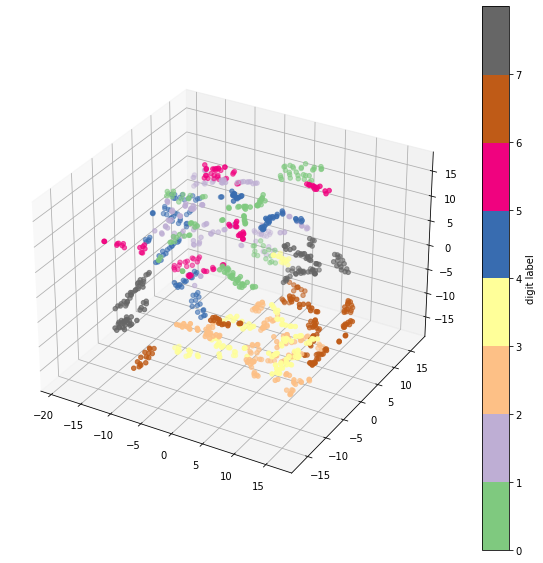

In [21]:
from sklearn.manifold import TSNE
# instead of using PCA we can use simply TSNE

def plot3d(X, labels):
    #%matplotlib inline
    #%matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = TSNE(n_components=3)
    # We consider items as simple vectors of 77 features
    X = X.reshape(-1, X.shape[1])
    # Reduce features dimensionality, just for visualization purpuses
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    labels = labels.copy()
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("Accent").colors[8 - nlabels:])
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[: ,2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(min(labels), max(labels)+1))
     
plot3d(X, labels=y)

Visualizing the data along the first three TSNE components provides a better visualization of our data. 
Points of the same class are still spread but the different clusters are more distant one from the others than across the first 3 principal components returned by PCA.

Anyway, as seen for the previous plot, it seems difficult to be able to cluster each class of mice in a different and well defined cluster. 

# Clustering analysis

The authors of the article first of all performed the clustering using all eight groups of control and trisomic mice but they failed to produce any clear cluster, this because mice with the same learning outcome probably don't differ in a significant way for their protein expression profile and so they are not separeted in well defined clusters.

Consequently they reduced the input data considering only the four classes of control mice to evaluate molecular events in normal learning.
They performed the clustering using:
- the complete dataset of 77 proteins;
- the 11 proteins that - from Wilcoxon-rank sum test - are significantly different in all four comparisons related to successful learning and the 13 proteins that describe memantine effects on the initial protein profiles.

Then they repeted the analysis using as input data the four classes of trisomic mice to examine failed learning and its rescue by memantine.
Once more they performed the clustering using:
- the complete dataset of 77 proteins; 
- the 15 protein changes that - from Wilcoxon-rank sum test - were common to the two comparisons that reflected rescued learning - t-CS-m vs t-SC-m and t-CS-m vs t-SC-s - plus the 12 proteins found different among mice that received memantine or not - t-SC-m vs t-SC-s.

Eventually they performed the clustering on different combinations of control and trisomic groups to examine differences in learning caused by trisomy.
First they considered the t-CS-s (failed learning), c-CS-s (normal learning) and c-CS-m (normal learning after memantine) classes using a subset of proteins: the 10 proteins that - from Wilcoxon-rank sum test - significantly differ between t-CS-s and c-CS-s and at the same time differ in levels between t-CS-s with c-CS-m.

As a further test, they used the same 10 proteins to cluster t-CS-m (rescued learning) with the two classes of successful learning in control mice - c-CS-m and c-CS-s.

# Clustering using all eight groups of control and trisomic mice

# Hierarchical clustering

Hierarchical clustering (or Agglomerative clustering) is a clustering technique that works by partitioning the points iteratively. A bottom-up approach starts by considering singleton clusters and then iteratively merges together the two most similar clusters.

This iterative approach allows us to reconstruct the sequence of merges and to build a hierarchy of clusters which is usually called dendrogram, that has as leaves our items. 
The dendrogram gives important information, for example how many steps are necessary to merge point of two clusters - that can be seen as a measure of similarity. 

The drawback of this algorithm is that it doesn't return the best number of clusters but all the possible clusters and then we have to decide where to cut it and so how many clusters obtain.

## Perform hierarchical clustering by building the Linakge Matrix

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix choosing the type of distance between points and the linkage method to compute the 
# distancee between clusters or a point and a cluster
Z = linkage(X, metric='euclidean', method = 'ward')

The linkage matrix specifies the sequence of merges, from the first one (first row) to the last one (last row).

Each row contains four information: the id of the two samples, or clusters, that have been merged at that particular iteration, the distance between id1 and id2 before the merge and the number of original observations contained in the cluster after the merge.

In [23]:
# Print the first 10 merges
Z[:10]

array([[1.04800000e+03, 1.04900000e+03, 1.47954195e-01, 2.00000000e+00],
       [3.30000000e+02, 3.31000000e+02, 1.74916288e-01, 2.00000000e+00],
       [2.70000000e+02, 2.71000000e+02, 1.75240959e-01, 2.00000000e+00],
       [1.95000000e+02, 1.96000000e+02, 1.80015273e-01, 2.00000000e+00],
       [8.11000000e+02, 8.12000000e+02, 1.82912070e-01, 2.00000000e+00],
       [1.53000000e+02, 1.54000000e+02, 1.86166726e-01, 2.00000000e+00],
       [7.80000000e+02, 7.81000000e+02, 1.86479221e-01, 2.00000000e+00],
       [4.83000000e+02, 4.84000000e+02, 1.88542052e-01, 2.00000000e+00],
       [1.00300000e+03, 1.00400000e+03, 1.89605022e-01, 2.00000000e+00],
       [1.06200000e+03, 1.06300000e+03, 1.90622975e-01, 2.00000000e+00]])

The distance increses since the first, second, third... merging operation is done between clusters that are progressivily more distant.

The first row is the first merge operation performed by the algorithm. Being the first these are the two closest points: merging between points 1048 and 1049, their distance is 0.15 and there are 2 observations in the cluster that is formed by the marging. 

Now we compute the linkages row numbers referring to a merge with at least one cluster: when we merge a point with a cluster or two clusters we must give an id to the new cluster with these two entities. This id, if we have 1077 points, must start from 1077.

In [24]:
mask = np.logical_or(Z[:, 0] >= 1077, Z[:, 1] >= 1077)

print(np.int32(Z[mask])[0])

[ 485 1084    0    3]


The first merging operation that involves a cluster is between point 485 with the already formed cluster identified by the id 1084. 

### Plotting the dendrogram 

We mark each intersection with its linkage row id, so that we can optionally inspect which nodes are under that part of the dendrogram.

Furthermore we define the function so that it plots a dendrogram that shows only the last 100 merges and that cuts the dendrogram in order to obtain a specific number of clusters - so we are using the a priori knowledge of how many classes we have in our data (it is not a good procedure).

In [25]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    # you can give to the plot dendrogram function either the model or the linkage matrix or the data. 
    # So first it checks if Z is none and in this case it looks at the model, if the model is null it looks at 
    # the data and creates the linkage matrix.
    # If you pass a linkage matrix the function will directly use it.
    # If you pass a model it either has a tree inside with some distances or it needs to have a linkage and affinity 
    # attribute to allow the function to build the linkage matrix
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters,2] + 1e-6
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram (you have to say how many last marging operations you have to plot)
    ddata = dendrogram(Z, ax=ax, **kwargs)
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                           textcoords='offset points',
                           va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax  

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

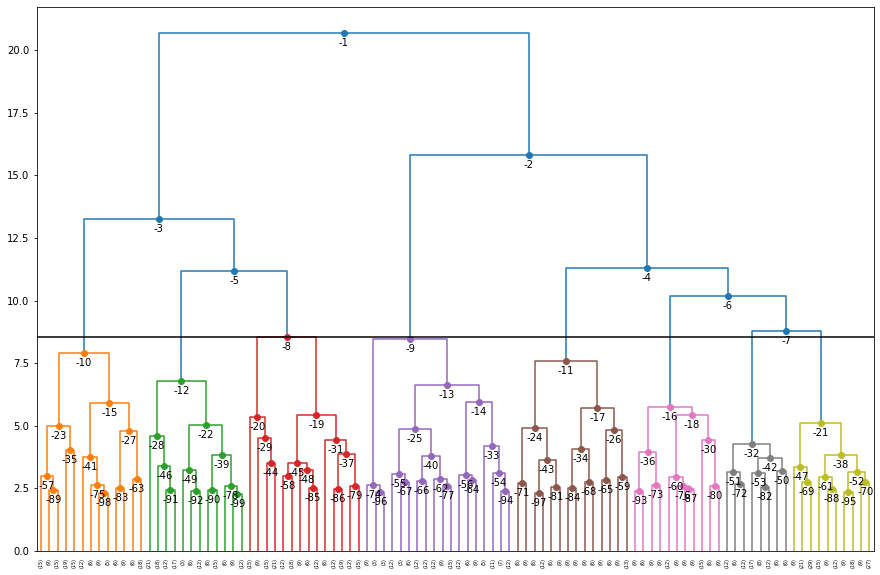

In [26]:
plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=8)

We can define a function to recursively backtrack the dendrogram, collecting the list of sample ids starting from an initial point of the linkage matrix.
Another function can be written to plot the elements (leaves of the dendrogram) that belong to that cluster.

In [27]:
def get_node_leaves(Z, idx, N):
    n1, n2 = int(Z[idx,0]), int(Z[idx,1])
    leaves = []
    for n in [n1, n2]:
        if n < N:
            leaves += [n]
        else:
            leaves += get_node_leaves(Z, n-N, N)
    return leaves

def plot_node(Z, X, y, idx, maxn=15*15):
    leaves = get_node_leaves(Z, idx, X.shape[0])
    labels, counts = np.unique(y[leaves], return_counts=True)
    nleaves = len(leaves)
    print(pd.DataFrame(np.array(counts).reshape(1,-1), 
                       columns=labels, index=["Frequency:"]))
    print("Items in the cluster:", len(leaves), "/", X.shape[0])

In [28]:
plot_node(Z, X.reshape(-1, 77), y, 0)

            7
Frequency:  2
Items in the cluster: 2 / 1077


The first merging operation - that creates the cluster with id = 1077 - is between the two closest, and so most similar, points of the dataset: we can see that they are two mice of class 7 (t-SC-s).

In [29]:
print(plot_node(Z, X.reshape(-1, 77), y, -10))
print(plot_node(Z, X.reshape(-1, 77), y, -12))
print(plot_node(Z, X.reshape(-1, 77), y, -8))
print(plot_node(Z, X.reshape(-1, 77), y, -9))
print(plot_node(Z, X.reshape(-1, 77), y, -11))
print(plot_node(Z, X.reshape(-1, 77), y, -16))
print(plot_node(Z, X.reshape(-1, 77), y, -32))
print(plot_node(Z, X.reshape(-1, 77), y, -21))

             2   3   4  6   7
Frequency:  58  38  15  9  24
Items in the cluster: 144 / 1077
None
             0   1   4   5
Frequency:  24  24  62  27
Items in the cluster: 137 / 1077
None
             0   1   4   5   6   7
Frequency:  30  27  34  39  15  36
Items in the cluster: 181 / 1077
None
             0   1   4   5
Frequency:  63  47  24  24
Items in the cluster: 158 / 1077
None
             0   1  3   5   6   7
Frequency:  33  22  6  15  15  27
Items in the cluster: 118 / 1077
None
             1   3   6   7
Frequency:  15  18  24  45
Items in the cluster: 102 / 1077
None
             2   3   6
Frequency:  35  14  30
Items in the cluster: 79 / 1077
None
             2   3   6
Frequency:  57  59  42
Items in the cluster: 158 / 1077
None


The 8 clusters obtained through hierarchical clustering contain a mix of observations of different classes: therefore hierarchical clustering seems not able to discriminate neither the eight classes depending on their protein expression profile nor is able to cluster apart mice with learning activity with respect to those without.

### Linkage methods

Linkage is important to compute the distance between a cluster and a point or two clusters. The distance between a convex set and a point is simple: there is only one point of the set that is the closest to that point. 
Generally we don't have convex but complex sets and so we can choose among different ways to compute this distance:

- Complete (maximal intercluster distance): compute all distances between points in cluster A and cluster B and return the largest of these distances.
- Single (minimal intercluster distance): as before, but we return the smallest distance.
- Average/Median (mean intercluster distance): as before, but we return the average/median of the distances.
- Centroid: we compute the distance of the two clusters as the distance between the two clusters means/centroids (the centroid is the mean point of the cluster).
- Ward (minimal inter-cluster variance): finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging - so having a cluster I add the point that realizes the minimum increase of the variance of the data.

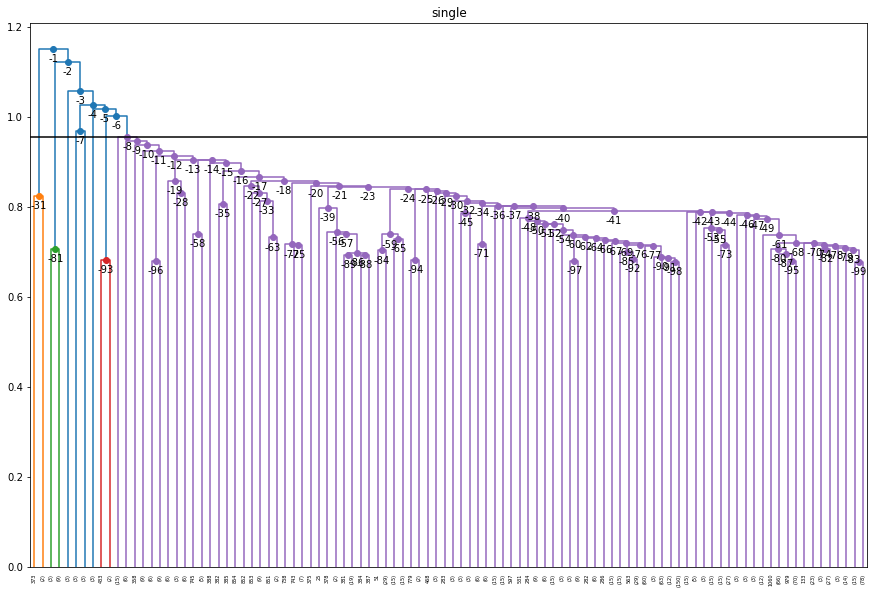

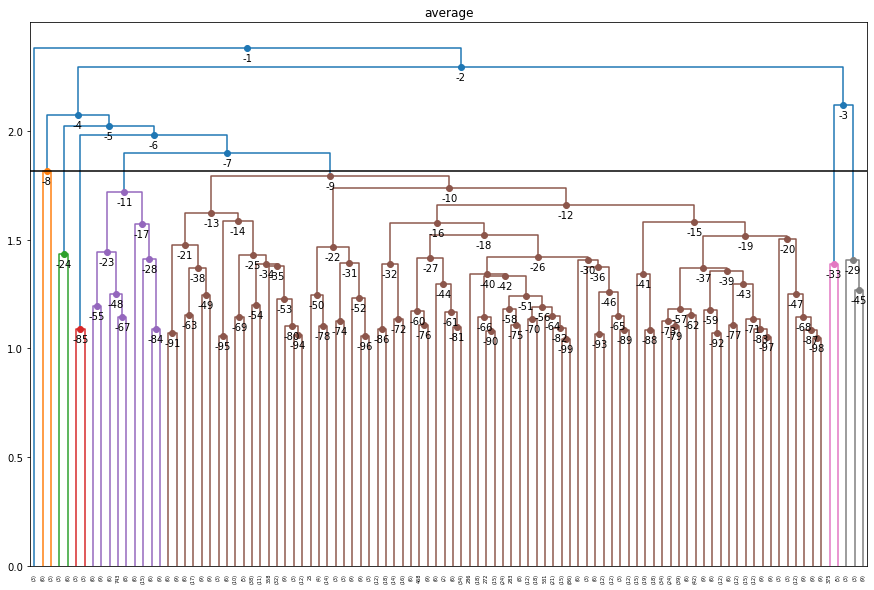

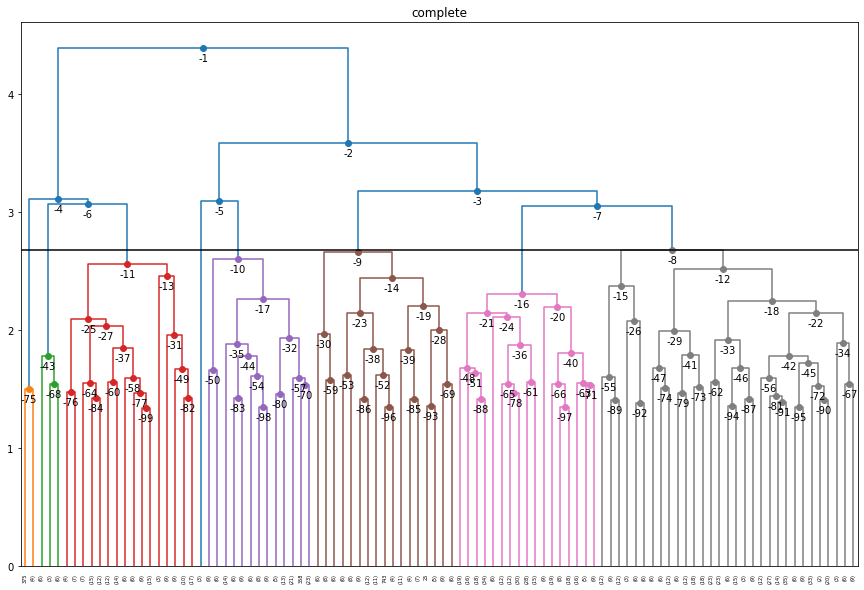

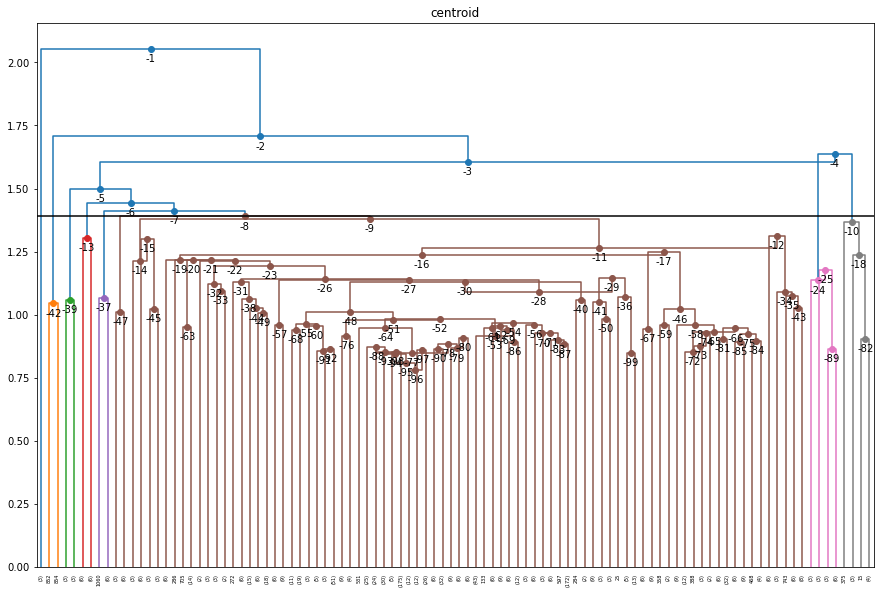

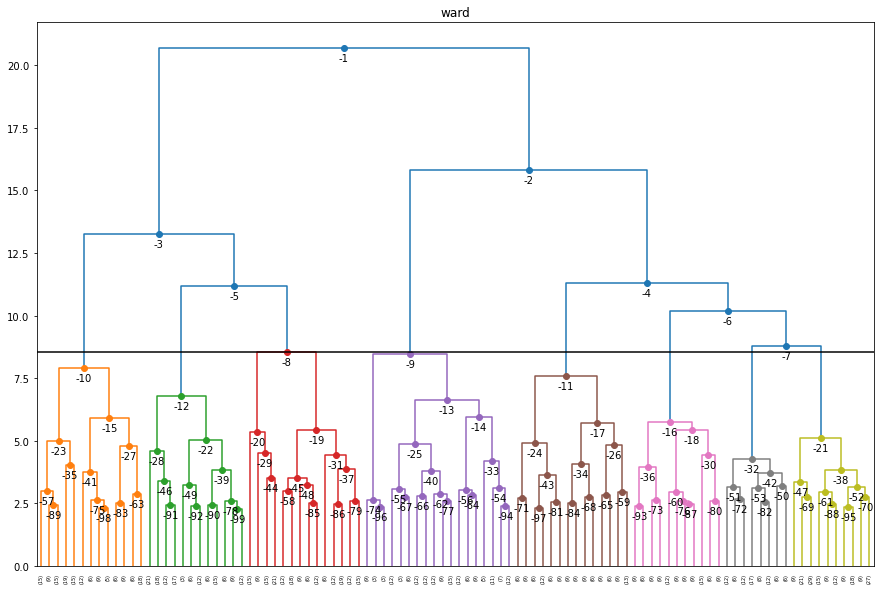

In [30]:
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = linkage(X, method = method, metric = 'euclidean')
    fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=8)
    ax.set_title(method)
    plt.plot(figsize=(20,10))

In the single linkage we add to the cluster the point that is at the smallest distance form it: we expect that each time we start from a cluster and probably this cluster has another closest point that we add to it. This is done iteratively and so starting from a cluster we collect all the points in it. This is not good since it has no sense. 

Complete linkage provides generally larger jumps than single and average.

Centroid merges very different stuffs: when we add a new point to a cluster we are modifing the information inside the cluster and so its centroid. This clustering makes closer to the new created cluster points that were far away before.

Ward is generally very stable (default choice for scikit-learn).

## Perform hierarchical clustering by using the standard scikit-learn API

We can specify a cut point using the distance_threshold method or the total number of cluster that we want with n_clusters. 

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

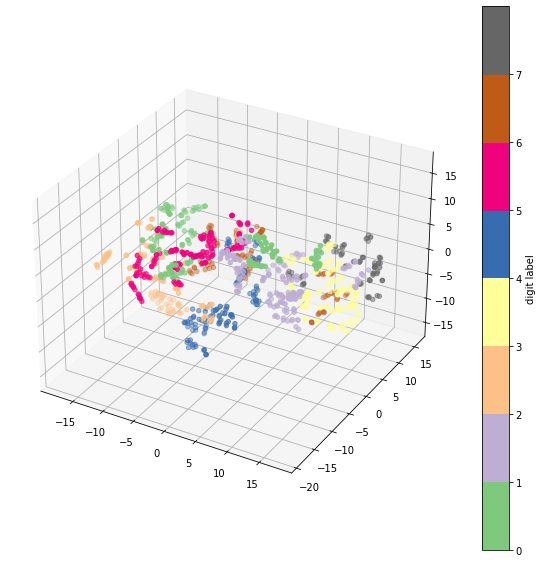

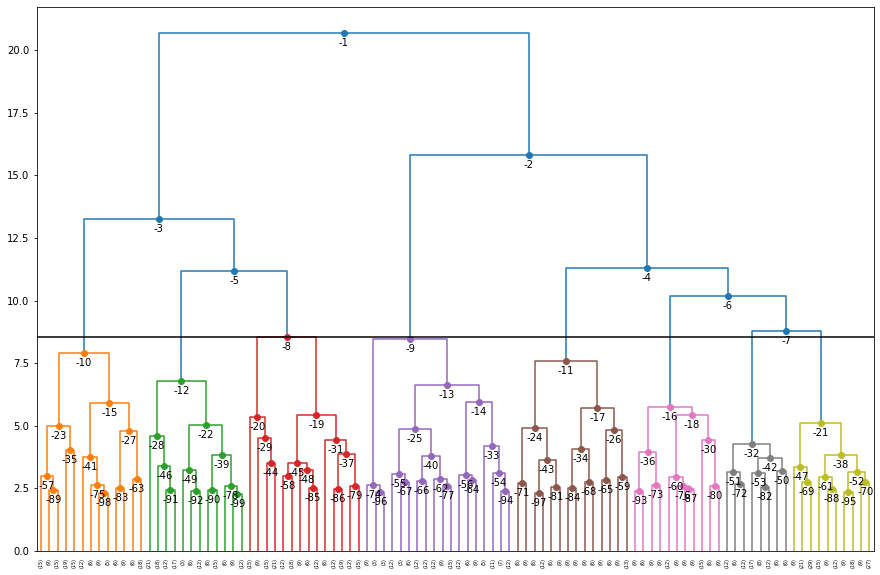

In [31]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None#270
n_clusters=8

model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)

Here clustering is performed by the Agglomerative Clustering algorithm telling it how many clusters we want to get - in this case 8 since this is the number of classes we know a priori.
Once the algorithm has performed the hierarchical clustering we can extract the predicted class of each mouse according to this model - that predicts it according to the expression profile of the different proteins in each mouse. 

Notice that the classes are divided in the different clusters exactly as they resulted using the linkage matrix, in fact, if we plot them along the first three dimensions of TSNE, we can see that the clusters are spread and there is no clear separation between them. 

This result seems little bit better than how the samples resulted when we visualized them using TSNE according to their true class. 
The divergence between how the observations are plotted based on their true class and on their predicted class by using hierarchical clustering suggests that this algorithm doesn't perform very well in clustering our data on the basis of their similarities: we expect that lot of mice have been clustered in the wrong predicted class.

# Clustering Metrics

## Cluster validity via correlation

The incidence matrix is an 𝑁×𝑁 matrix (where N is the number of samples) having a 1 in position (𝑖,𝑗) if the samples 𝑖 and 𝑗 have the same predicted cluster id. 

We define the similarity matrix as an 𝑁×𝑁 matrix containing the similarity (1−𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒) between each pair of points. 

The clustering correlation is defined as the correlation - normalized dot product - between these matrices, seen as two vectors.
We want these two vectors - incidence matrix and similarity matrix - to be very similar and so the normalized dot product must be almost 1: high correlation indicates that points that belong to the same cluster are close to each other.

In [32]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

# Compute the incidence matrix
def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    # loop through the cluster: to compute the incidence matrix we take only the points of that specific cluster 
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i) # indices of the samples in this cluster
   
        # Compute combinations of these indices
        xx, yy = np.meshgrid(sample_idx, sample_idx)
        
        mat[xx, yy] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric = metric)
    # this is a distance matrix but its score has to be normalized and for this reason we extract the min and max
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)

    inc = normalize(inc.reshape(1, -1))
    # this is the standard normalization in which the mean must be 0 and the variance 1
    sim = normalize(sim.reshape(1, -1))
    corr = inc @ sim.T # this is the dot product
    
    return corr[0,0]   

In [33]:
correlation(X, y_predict, 'euclidean')

0.4096001305647019

The correlation between the incidence matrix and the similarity matrix is quite low: probably the selected distance metric is not very good in our case or it is difficult to distinguish all the eight classes considering them toghether.  

In [34]:
y_rand = np.random.randint(0, n_clusters, y.shape[0])
correlation(X, y_rand, 'euclidean')

# the correlation score in case of random predictions is lower 

0.3514644292552934

We sort the similarity matrix and then we order rows and columns so that points with the same cluster id are close to each other.

In [35]:
def sorted_mat(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted,:]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(10,5))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

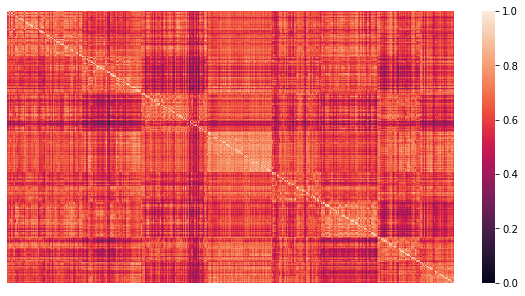

In [36]:
sim = similarity_mat(X, 'euclidean')
plot_sorted_mat(sim, y_predict)

Plotting the sorted similarity matrix we can see darker regions in which the similarity between points is smaller, while the light regions are those where the similarity is higher. 
Across the diagonal there are the clusters.

There are light rectangles also outside the diagonal since, as said, some of the classes are not expected to differ very much depending on their expression profile and so maybe mice of these classes can be wrongly clustered together by the clustering algorithm.

Plotting the sorted incidence matrix we can see along the diagonal the different clusters made of observations that are very similar between each other.

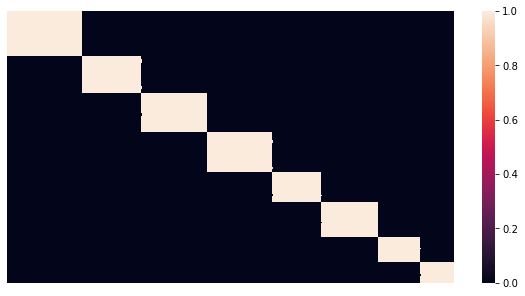

In [37]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

From the plot we can see that the dimensions of the predicted clusters is not so variable, consistently with the number of mice in each class that we know is between 105 and 150.

## Deciding the number of clusters

When we perform the hierarchial clustering we usually don't have the information about the number of clusters a priori and so we can use the dendrogram to understand in how many clusters the data can be subdivided: this is done with the elbow analysis.

There are two quantities we look at when we perform clustering:

- within cluser distance (WSS): the distance between the points in the same cluster;
- distance between points of different clusters (BSS).

If the clustering worked well the sum of distances between any pair of points in the same cluster will be low, while the sum of distances between any pair of points of different clusters must be high. 
If we have only one cluster the WSS is gonna be high, if we have a lot of meaningless clusters the WSS will be very low. 

BSS is super high when we have a lot of clusters, otherwise super low.

We can plot these two metrices - the WSS and the BSS: the point in which they intersect is used to compute another index - the silhouette score.

In [38]:
def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # this is a matrix representing all the possible distances
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = dist_mat * inc
    # matrix to represent distances only between elements of the same cluster
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1) # k=1 to exclude the diagonal
    
    wss = (dist_mat[triu_idx] ** 2).sum()
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat = dist_mat * (1 - inc)
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = (dist_mat[triu_idx] ** 2).sum()
    
    return bss

print("WSS", wss(X, y_predict, 'euclidean'))
print("BSS", bss(X, y_predict, 'euclidean'))

WSS 142262.8055503833
BSS 1629675.8941274695


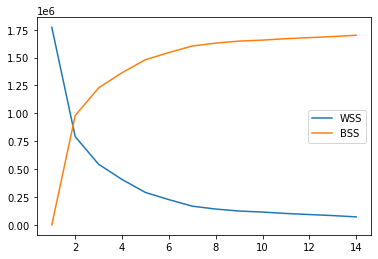

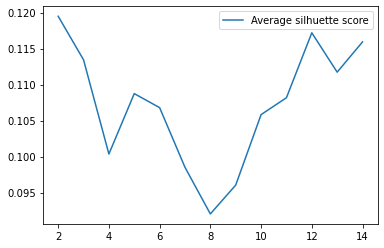

In [39]:
from sklearn.metrics import silhouette_score
%matplotlib inline
wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    affinity='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()

We fit agglomerative clustering for several different numbers of clusters: for each fitting we compute the WSS and BSS scores and eventually we plot them.
The BSS is really low when the number of clusters is low (all the points belong to the same cluster); the WSS is low when the number of clusters is high. 
The silhuette score is a combination of the two: either you can try to analyse the first plot to understand where to perform the cut, or you can take the silhuette score and perform the cut where it reaches the maximum.

According to the silhuette score the best number of clusters in which divide our data is 2, another evidence of the fact that hierarchical clustering algorithm is not able to cluster the data in a way coherent with the classes we know they belong to: this means that it is not possible to distinguish the eight classes of mice depending on their similarity/difference in protein expression levels.

This best number of clusters may be explained by the fact that, even if mice are classified differently, there are two observed learning outcomes - the mice with normal learning activity and those not able to learn - and so very probably mice can be classified in these two groups depending one their protein expression profile.

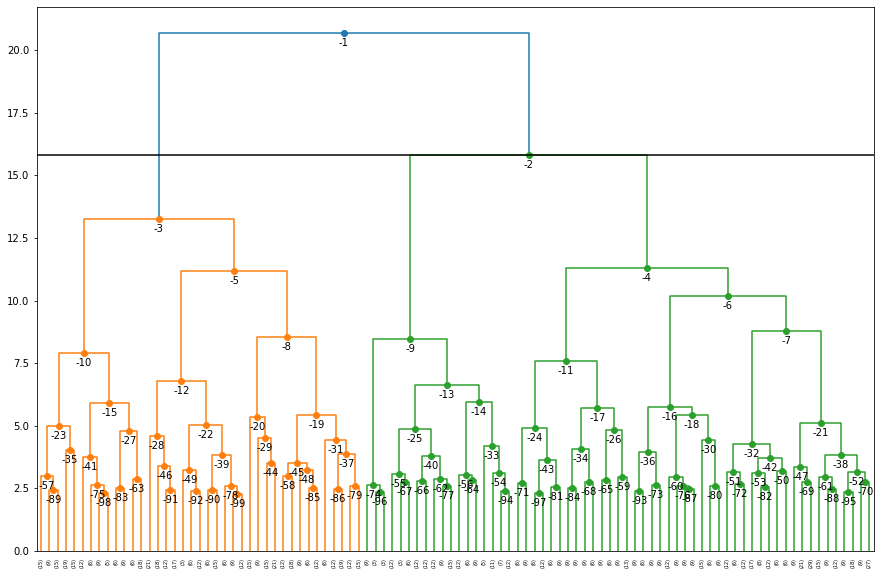

In [40]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                          p=100, n_clusters=2)

From the dendrogram we can see that indeed there are two main clusters that are the most separated ones. 

In [41]:
plot_node(Z, X, y, -2)

             0   1   2   3   4   5    6   7
Frequency:  96  84  92  97  24  39  111  72
Items in the cluster: 615 / 1077


When clustering the data in two clusters one of them contains mainly c-CS-m, c-CS-s, c-SC-s, c-SC-m and t-SC-m mice. This doesn't make sense since they are mice with different learning outcome, so probably the agglomerative clustering algorithm is not performing well on all the data using this distance metric.

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

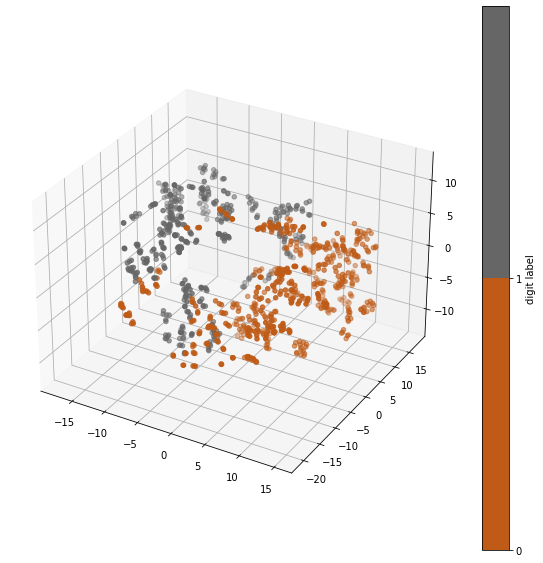

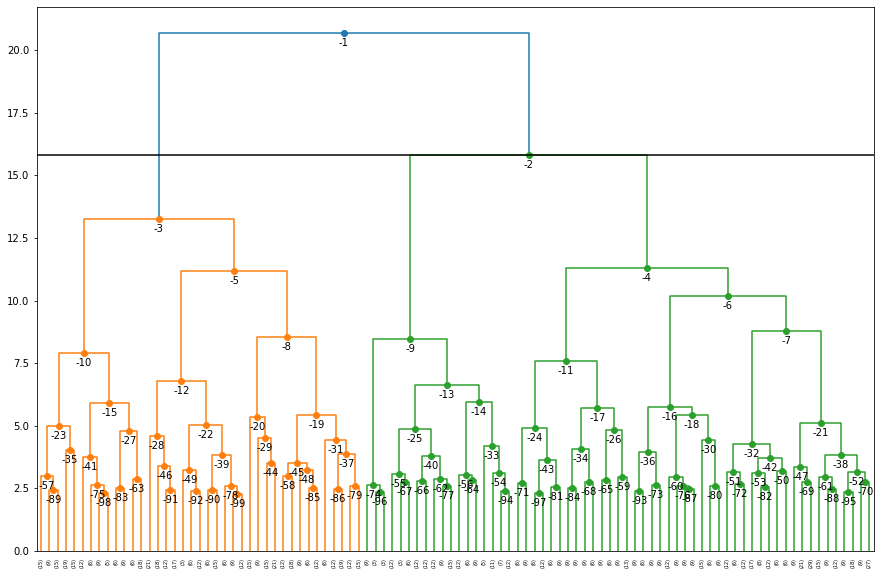

In [42]:
model = AgglomerativeClustering(n_clusters=2, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X) 

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

The two clusters identified via Agglomerative clustering algorithm are spread but separeted. Anyway we know that the observations belonging to each of them are a mix of mice with different learning activity.

## Precision, Recall and Purity

Remember that there is no correspondence between the labels of the clusters and the actual labels of the problem: because of this we always need to compute precision and recall of a specific cluster for a specific label.

Notice: we can compute this metrics only if we know the underlying true cluster assignments.

- precision of class j in cluster k is the number of observation of class j that belong to cluster k divided by the total number of obseravtions in cluster k;
- recall of class j in cluster k is the number of observation of class j that belong to cluster k divided by the total number of obseravtions of class j;
- purity of a cluster is the maximum precision value associated to that cluster;
- purity of all the clustering is the sum over each cluster of the purity of that cluster times the number of observation in that clusters divided by the overall number of observations. 

In [43]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

In [44]:
tot_purity(y_predict, y)

0.20612813370082872

The purity of the whole clustering result is very low but this is expected since we are clustering data from 8 different classes in two clusters. 

In [45]:
tot_purity(y_rand, y)

0.17177344474120454

The overall purity obtained through random clustering is worse.

# Other metrics to evaluate clustering:

- Entropy: degree to which each cluster consists of elements of the same class. 
The total entropy of a clustering is the sum weighted by the size of each cluster of the entropy of that cluster (that in turn is the negative of the sum, for each class in the cluster, of the product of the precision times the log2 of the precision).

To compute it I used the sklearn function v_measure_score that is defined as the mean of two desired properties of a cluster: the homogeneity - each cluster contains only members of a single class - and the completeness - all members of a given class are assigned to the same cluster. The closer it is to 1 the better is the clustering result.

- Jaccard Similarity: the ideal cluster similarity matrix (n×n) has entries equal to 1 if the two objects belong to the same cluster and 0 otherwise.

In [46]:
from sklearn.metrics.cluster import v_measure_score

v_measure_score(y, y_predict)

0.05468094188422634

In [47]:
from sklearn.metrics import jaccard_score

jaccard_score(y, y_predict, average='weighted')

0.03169410750883951

Coherently with the purity outcome, both entropy and jaccard similarity are very low.

## Distance metrics

I considered different distance metrics:

- euclidean (p=2): used in case of low-dimensional data and when the magnitude of the vectors is important to be measured;
- cityblock (p=1): also known as manhattan distance or l1 norm and it works well on high-dimensional data;
- correlation: it measures the distance as the linearity between the data;
- minkowski: it allows to iterate over p parameter and find the distance measure that works best for your use case.

To evaluate which is the best distance metric to use when performing the agglomerative clustering I write the following function that - for each distance metric - returns the best number of clusters in which dividing the data, the correlation and the overall purity obtained running the algorithm with that distance and the best number of clusters.

Notice that ward linkage method can be used only with euclidean distance and so for all the others distance matrics I used the complete linkage method.

In [48]:
def best_distance_metric():
    
    for dist in ['euclidean', 'cityblock', 'correlation', 'minkowski']:
        
        print(dist)

        sil_dict = dict()
        clus_list = list(range(2, len(np.unique(y))))
        
        for nc in clus_list:  
            if dist == 'euclidean':
            
                model = AgglomerativeClustering(n_clusters=nc,
                                                affinity= dist, 
                                                linkage='ward')
            else:
            
                model = AgglomerativeClustering(n_clusters=nc,
                                                affinity= dist, 
                                                linkage='complete')

            y_predict = model.fit_predict(X)

            sil_dict[nc] = silhouette_score(X, y_predict, metric= dist)
        

        best_nc = [nc for nc in sil_dict.keys() if sil_dict[nc] == max(sil_dict.values())]
        print(f'best number of clusters: {best_nc[0]}')
        
        if dist == 'euclidean':
            model = AgglomerativeClustering(n_clusters=best_nc[0], affinity=dist, linkage='ward')
        else:
            model = AgglomerativeClustering(n_clusters=best_nc[0], affinity=dist, linkage='complete')

        y_predict = model.fit_predict(X)
        print('correlation =', correlation(X, y_predict, metric =dist))
        print(f'total purity = {tot_purity(y_predict, y)}\n')
        
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7340691630098675
total purity = 0.20612813370082872

cityblock
best number of clusters: 2
correlation = 0.7314284804103359
total purity = 0.23119777158348254

correlation
best number of clusters: 2
correlation = 0.8104610951578151
total purity = 0.20705663880720176

minkowski
best number of clusters: 2
correlation = 0.8654331430366446
total purity = 0.17641597028412742



From the result I think that the best distance metric to use is cityblock. In fact the Agglomerative clustering performance using this metric is the best one both considering the total purity and the correlation. 

Notice that, whatever distance metric we use, the best number of clusters - so the one for which the silhouette score is the highest - is always 2.

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

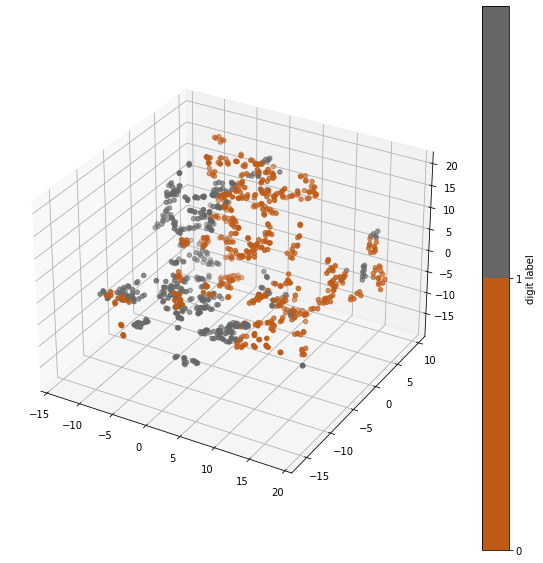

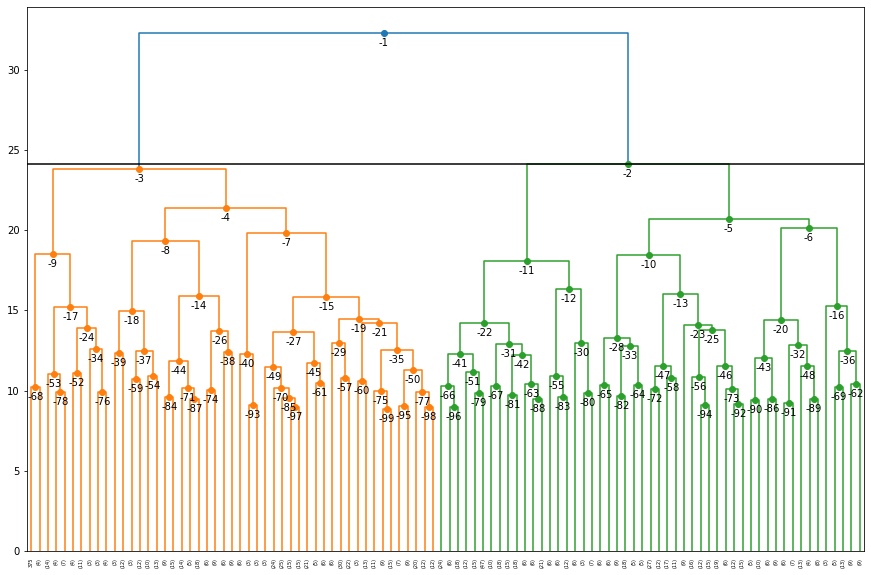

In [49]:
model = AgglomerativeClustering(n_clusters=2, affinity='cityblock', linkage='complete')

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

We can see, above all from the dendrogram, that the two clusters are better separeted than before.

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

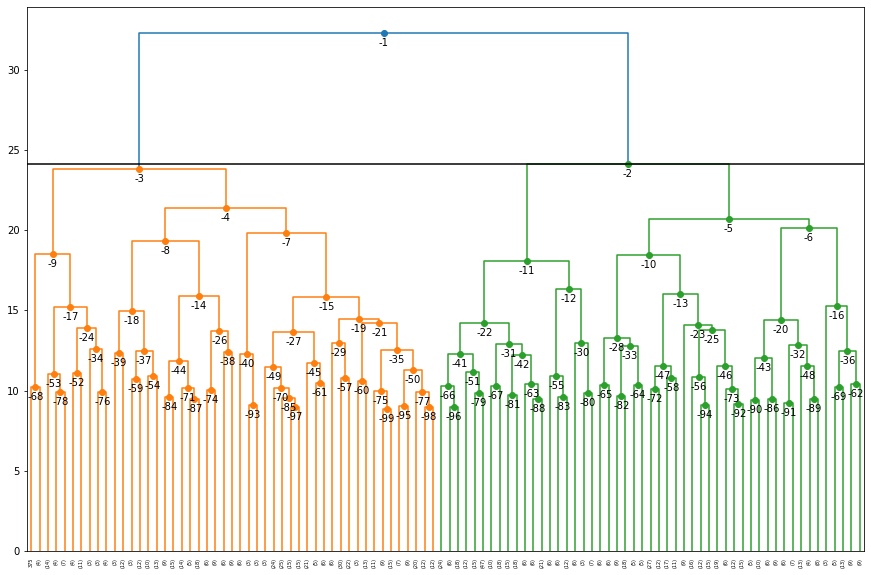

In [50]:
Z = linkage(X, metric='cityblock',method='complete')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [51]:
plot_node(Z, X.reshape(-1, 77), y, -2)

             0   1    2   3   4   5   6   7
Frequency:  47  45  146  88  69  46  68  74
Items in the cluster: 583 / 1077


In one of the two clusters there is a prevalence of mice of class 2, 3 and 7 - that correspond to class c-SC-m, c-SC-s and t-SC-s. This makes sense since they are classes of mice that are not stimulated to learn and thus don't show learning ability.

In the other cluster we expect to have a higher frequency of mice that were stimulated.

From this result we can say that hierarchical clustering - with cityblock distance metric and a complete linkage method - is able to catch the difference between stimulated mice and those who weren't, even if this discrimination is only light and not sharp.

# KMeans

Unlike hierarchical clustering, it needs to know in advantage the final number of clusters K.
This algorithm starts randomly assigning each point to one of the K clusters, for each cluster it computes the centroid and then re-assign each point to the cluster with the closest centroid. It repeats iteratively these steps till the convergence. 

KMeans has some problems when clusters:

- have different sizes
- have different densities
- have non globular shapes
- have outliers that do not belong to any cluster.

This because KMeans is based on Euclidean distance: when we select the centroids and compute the maximum distance from the centroids we are using the n-dimensional equivalent of spheres, thus there is no chance to be able to separate clusters with no spheric shape. Furthermore KMeans doesn't consider the density concept but only the distance.

First I use the silhuette score to find the number of clusters for which the WSS is the minimum and BSS the maximum, computing it for all the three possible initializations.

In [52]:
from sklearn.cluster import KMeans

def best_nclusters_KMeans(distance,method):
    clus_list = list(range(2, len(np.unique(y))))

    sil_dict1 = dict() 
    sil_dict2 = dict() 
    sil_dict3 = dict()

    for nc in clus_list:
        model1 = KMeans(n_clusters=nc, init='random', random_state=0)     
        y_predict1 = model.fit_predict(X)

        sil_dict1[nc] = silhouette_score(X, y_predict1, metric=distance)

        model2 = KMeans(n_clusters=nc, init='k-means++', random_state=0)     
        y_predict2 = model.fit_predict(X)

        sil_dict2[nc] = silhouette_score(X, y_predict2, metric=distance)

        hmodel = AgglomerativeClustering(n_clusters=nc, 
                                     distance_threshold=distance_threshold, 
                                     affinity=distance, linkage=method)    
        y_predict3 = hmodel.fit_predict(X)

        centroids = np.stack([X[y_predict3==k].mean(0) for k in range(nc)])
        model3 = KMeans(n_clusters=nc, init=centroids, n_init=1, random_state=0)    

        sil_dict3[nc] = silhouette_score(X, y_predict3, metric=distance)

    best_nc1 = [nc for nc in sil_dict1.keys() if sil_dict1[nc] == max(sil_dict1.values())]
    best_nc2 = [nc for nc in sil_dict2.keys() if sil_dict2[nc] == max(sil_dict2.values())]
    best_nc3 = [nc for nc in sil_dict3.keys() if sil_dict3[nc] == max(sil_dict3.values())]
    print(f'best number of clusters with random init: {best_nc1[0]}')
    print(f'best number of clusters with k-means++ init: {best_nc2[0]}')
    print(f'best number of clusters with Hierarchical+Kmeans init: {best_nc3[0]}')
     
best_nclusters_KMeans('cityblock','complete')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


Since the best number of cluster seems to be 2 we can deduce that also KMeans algorithm is not able to cluster the eight classes in a way coherent with the class we know they belong to.

Kmeans clustering purity 0.19962859795358118


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


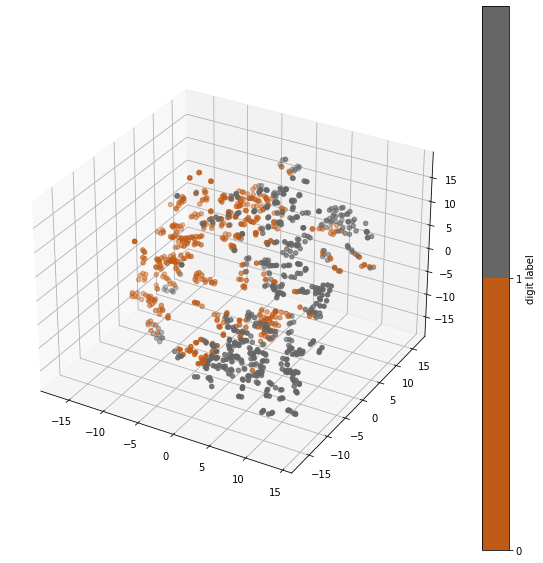

In [53]:
model = KMeans(n_clusters=2, init='random', random_state=0)     
# initialize method is how I set the first clusters: randomly or with other methods
y_predict = model.fit_predict(X)
print("Kmeans clustering purity", tot_purity(y_predict, y))

plot3d(X, labels=y_predict)

After performing KMeans with K = 2, we plot the observations taking into account their predicted class: even if we can distinguish the two clusters and they are not totally mixed, they are both spread and very close to each other.

## Initialization

KMeans performance greatly depends on the initial points. 

Multiple strategies exists:

- random initialization;
- running hierchical clustering on a smaller set of points, searching for K cluster, and then initializing KMeans as the centroids identified by hierarchical clustering;
- furthest initialization: picking K points which are as far as possible from each other (start with a random point, then select the furthest one, then the furthest from the two selected points, and so on);
- kmeans++: similar to furthest initialization, but each time we compute the minimum distance 𝐷(𝑥) between a point x and one of the selected centroids. Then we randomly select the next one with probability inversally proportional to  𝐷(𝑥)2. In other words, we sample points far away with higher probability w.r.t. those close to already selected points

In [54]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='cityblock', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.19962859795358118
Kmeans++ purity 0.19962859795358118
Hierarchical+Kmeans purity 0.1792014856048455


Random and k-means++ initialization methods lead to higher purity.

In [55]:
model = KMeans(n_clusters=2, init='k-means++', random_state=0)     
y_predict = model.fit_predict(X)
print('correlation =', correlation(X, y_predict, 'cityblock'))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.7368786714685721
entropy = 0.048359239297000145
jaccard similarity = 0.03521468169787567


Except for the correlation metric, all the evaluation scores of KMeans - using K=2 and the best initialization method - are not good.

This means that KMeans is not able to cluster our data in all the eight classes they belong to.

In [56]:
def cluster_composition(y,y_predict):
    d = dict()

    for i in zip(y,y_predict):
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1

    for i in range(8):
        if i in y_predict:
            print(f'cluster {i} contains:')
            for k in d.keys():
                if k[1] == i:
                    print(f'{d[k]} observations of cluster {k[0]}')

cluster_composition(y,y_predict)

cluster 0 contains:
87 observations of cluster 0
81 observations of cluster 2
62 observations of cluster 1
93 observations of cluster 3
35 observations of cluster 4
115 observations of cluster 6
32 observations of cluster 5
72 observations of cluster 7
cluster 1 contains:
63 observations of cluster 0
69 observations of cluster 2
73 observations of cluster 1
42 observations of cluster 3
100 observations of cluster 4
20 observations of cluster 6
73 observations of cluster 5
60 observations of cluster 7


KMeans clusters the data in two main clusters: one contains mainly t-SC-m and c-SC-s mice, the other contains with higher frequency t-CS-m, c-CS-s and t-CS-s observations. So KMeans, as hierarchical clustering, divides the eight classes according to the fact they have been stimulated to learn or not.

Naturally the purity of the result of KMeans is low because it is not able to distinguish between all the eight classes of mice, anyway I think that the evaluation has to be done according to the ability of the algorithm to divide the eight classes based on the fact they were stimulated or not.

# DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. It has three major advantages with respect to the previous two algorithms:

- it doesn't need to know the number of clusters in advantage
- it can cluster arbitrary shapes
- it is able to identify and handle outliers 
- the only two parameters it needs are the radius and the number of neighbors points.

Given eps and MinPts, we define:

- core point: a point having at least MinPts points inside a radius of size eps
- border point: a point having fewer than MinPts in eps, but it is inside the neighborhood of a core point
- noise point: a point that is neither a core point nor a border point. Clustered with cluster id -1

The algorithm starts with a random point p and retrieves all the points which are density reachable from p. If p is a core point the cluster is kept and the algorithm moves to the next unvisited point until all points have bees visited.

We can search for the best parameters - the radius and the number of neighbor points - using grid search cv.

In [57]:
# re define make_scorer function since some clustering algorithms, as DBSCAN, don't have predict() method 
# but only fit_predict()

def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# for each hyperparameters combination we compute the clustering purity
params = {'eps': np.linspace(0.5,1.5,20), 'min_samples': range(1,15)}
model = DBSCAN()
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

In [59]:
# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 0.868421052631579, 'min_samples': 7}
CV score 0.19405756726878287


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.011522      0.000526         0.009496        0.001407       0.5   
1         0.011224      0.000186         0.009279        0.001647       0.5   
2         0.010501      0.000939         0.009587        0.001582       0.5   
3         0.010897      0.000178         0.009388        0.001487       0.5   
4         0.011163      0.000164         0.009574        0.001371       0.5   
..             ...           ...              ...             ...       ...   
275       0.015214      0.000753         0.010792        0.001346       1.5   
276       0.014398      0.000109         0.010392        0.001406       1.5   
277       0.015161      0.001059         0.010355        0.001155       1.5   
278       0.013873      0.000383         0.010294        0.001538       1.5   
279       0.013767      0.000298         0.010515        0.001080       1.5   

    param_min_samples                           params  split0_test_score  \
0                   1   {'eps': 0.5, 'min_samples': 1}           0.044568   
1                   2   {'eps': 0.5, 'min_samples': 2}           0.055710   
2                   3   {'eps': 0.5, 'min_samples': 3}           0.055710   
3                   4   {'eps': 0.5, 'min_samples': 4}           0.072423   
4                   5   {'eps': 0.5, 'min_samples': 5}           0.064067   
..                ...                              ...                ...   
275                10  {'eps': 1.5, 'min_samples': 10}           0.417827   
276                11  {'eps': 1.5, 'min_samples': 11}           0.417827   
277                12  {'eps': 1.5, 'min_samples': 12}           0.417827   
278                13  {'eps': 1.5, 'min_samples': 13}           0.417827   
279                14  {'eps': 1.5, 'min_samples': 14}           0.417827   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.027855           0.047354         0.039926        0.008611   
1             0.030641           0.047354         0.044568        0.010422   
2             0.033426           0.050139         0.046425        0.009469   
3             0.108635           0.058496         0.079851        0.021132   
4             0.105850           0.052925         0.074280        0.022782   
..                 ...                ...              ...             ...   
275           0.376045           0.367688         0.387187        0.021933   
276           0.376045           0.367688         0.387187        0.021933   
277           0.376045           0.367688         0.387187        0.021933   
278           0.376045           0.367688         0.387187        0.021933   
279           0.376045           0.367688         0.387187        0.021933   

     rank_test_score  
0                268  
1                266  
2                265  
3                252  
4                254  
..               ...  
275               85  
276               85  
277               85  
278               85  
279               85  

[280 rows x 13 columns]

DBSCAN purity 0.19405756726878434
entropy = 0.12813550188666775
jaccard similarity = 0.05728347309019007
Number of outliers 53
   -1    0   1   2   3   4   5
0  53  961  11   9  15  15  13


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


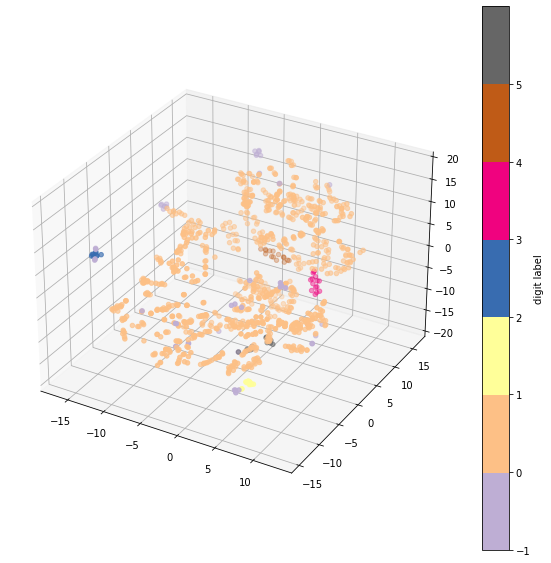

In [60]:
model = DBSCAN(eps=0.87, min_samples=7)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

From DBSCAN analysis, using the best parameters identified by grid search CV - a radius of 0.87 and 7 neighbors points - the data result clustered in 6 clusters plus 53 outliers.
Furthermore we can see that almost all the points are clusterd in the same cluster, while the other five clusters contain no more than fifteen points.

The purity is very similar to the one of the other clustering algorithms. The entropy and jaccard similarity score computed for DBSCAN result are better than the ones of hierarchical clustering and KMeans, even if they remain low.

In [61]:
cluster_composition(y,y_predict)

cluster 0 contains:
146 observations of cluster 0
143 observations of cluster 2
90 observations of cluster 1
120 observations of cluster 3
135 observations of cluster 4
111 observations of cluster 6
84 observations of cluster 5
132 observations of cluster 7
cluster 1 contains:
11 observations of cluster 1
cluster 2 contains:
9 observations of cluster 1
cluster 3 contains:
15 observations of cluster 3
cluster 4 contains:
15 observations of cluster 6
cluster 5 contains:
13 observations of cluster 5


We can see that the in the biggest cluster, that contains the greatest part of the observations, there are mice of all the eight classes more or less in the same quantity.

Both cluster 1 and cluster 2 contain only c-CS-s mice, in cluster 3 there are only c-SC-s mice, in cluster 4 only t-SC-m observations while in cluster 5 there are only t-CS-s mice.

The fact that the majority of observations are clustered together means that when we consider the mice of all the eight classes is difficult to find a good way to discriminate among them on the base of their expression of the 77 proteins.
And this happens both if we try to group them using the concept of distance and if we use the concept of density and connectivity, as DBSCAN does.

#  Clustering generated only with groups of control mice to evaluate molecular events in normal learning

The authors of the article report as result of the clustering analysis on the four control classes that:
- the two classes of control mice that learn successfully - c-CS-s and c-CS-m - are clearly separated from the two SC classes that do not learn -> learning in control mice is associated with distinct differences in protein expression levels.
- among the two SC classes only a single node mixes both c-SC-s and c-SC-m measurements -> memantine alone is also associated with distinct differences in protein levels that discriminate memantine injection from saline.
- the two CS classes are not so well separated into c-CS-s and c-CS-m clusters: seven of the 25 CS nodes mix c-CS-s and c-CS-m -> Memantine does not alter the success of learning and therefore the similarities in differences in protein levels in these CS nodes may predominantly reflect responses to learning not effects of memantine.

In [62]:
# extract the expression values only of the four classes of control mice

index = []
for cl in range(4,8):
    index = index + df[df['class'] == cl].index.to_list()
    
df_control = df.drop(index)
    
df_control.shape

(570, 78)

In [63]:
# extract the expression values of each protein in all the mice
X = df_control.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_control['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (570, 77)
y shape = (570,)


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


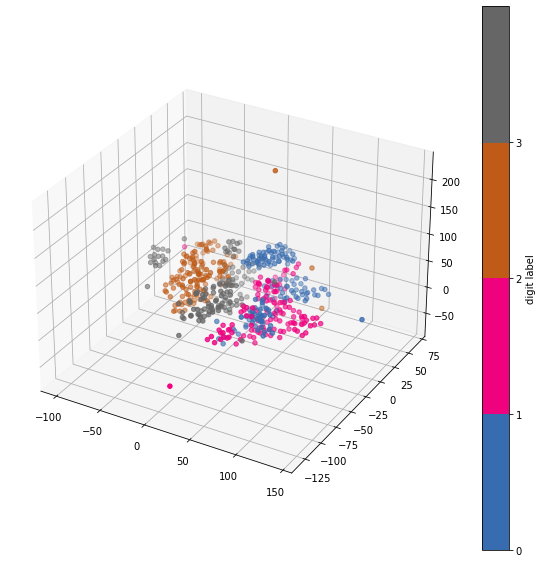

In [64]:
plot3d(X, labels=y)

From the TSNE visualization we can see that mice of the same class are more concentrated. We can notice that c-CS mice (class 0 and 1) and c-SC ones (class 2 and 3) are at the two different sides and the two c-CS classes are more mixed that the two c-SC ones.

## Hierachical clustering by building the Linkage Matrix

First of all I look for the best distance metric and the best number of clusters.

In [65]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7361489940502633
total purity = 0.49999999998245614

cityblock
best number of clusters: 2
correlation = 0.7637405813103523
total purity = 0.378947368407113

correlation
best number of clusters: 2
correlation = 0.7561178860648902
total purity = 0.41052631577417487

minkowski
best number of clusters: 2
correlation = 0.7254787718233897
total purity = 0.32456140349743334



The euclidean distance is the one that performs better both considering the overall purity and the correlation. 

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

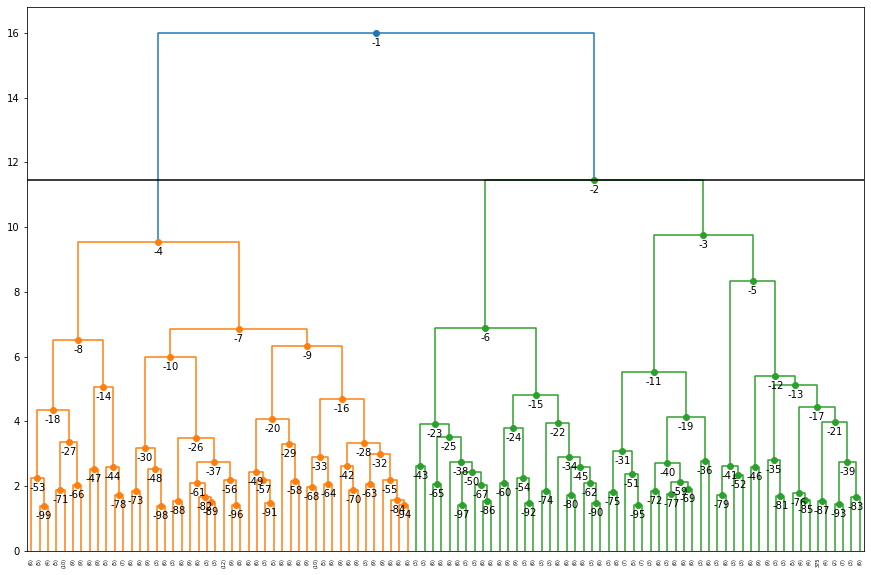

In [66]:
Z = linkage(X, metric='euclidean',method='ward')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [67]:
plot_node(Z, X.reshape(-1, 77), y, -2)

              0    1   3
Frequency:  120  135  15
Items in the cluster: 270 / 570


In [68]:
plot_node(Z, X.reshape(-1, 77), y, -4)

             0    2    3
Frequency:  30  150  120
Items in the cluster: 300 / 570


We can see that in cluster -2 there are above all mice of classes c-CS, while in cluster -4 there are observations mainly liked to c-SC mice.

This suggests that c-SC mice are well separeted from c-CS: this makes sense since c-CS mice are those that show a learning activity, while the c-SC ones are not stimulated and this can be discriminated by their different protein expression profile.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

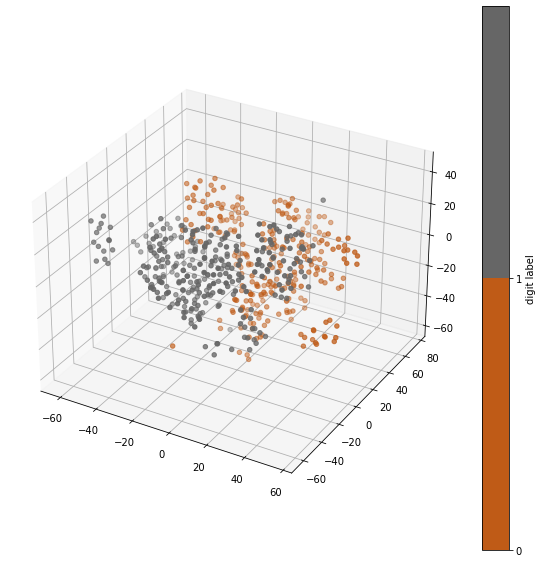

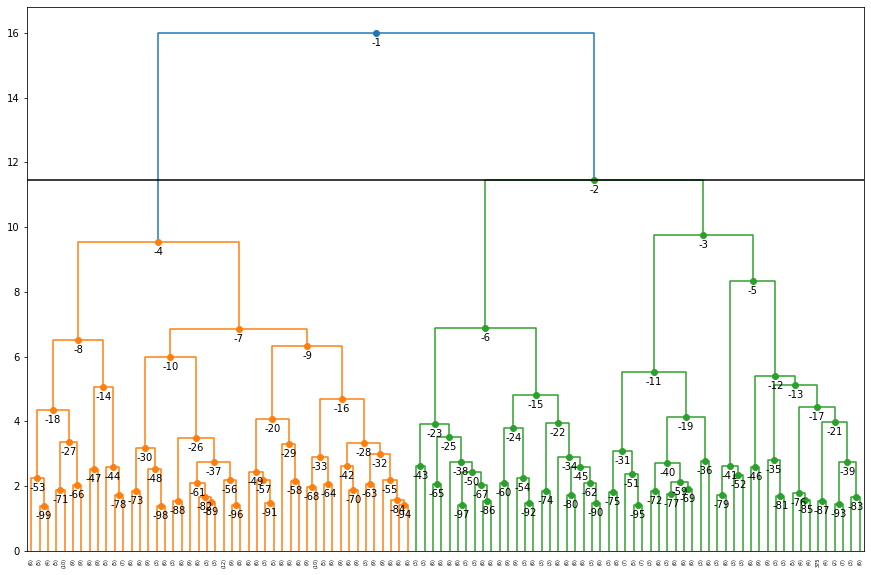

In [69]:
distance_threshold=None#270
n_clusters=2

model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold, affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X)
    
plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)

From TSNE visualization the two clusters seem well separeted even if spread.

## Evaluation

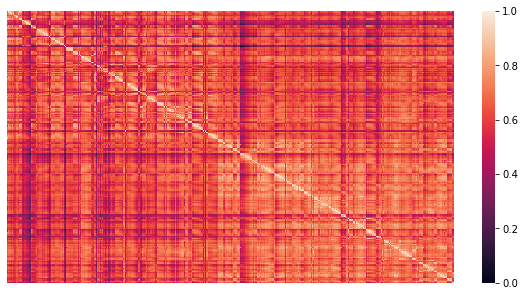

In [70]:
sim = similarity_mat(X, 'euclidean')
plot_sorted_mat(sim, y_predict)

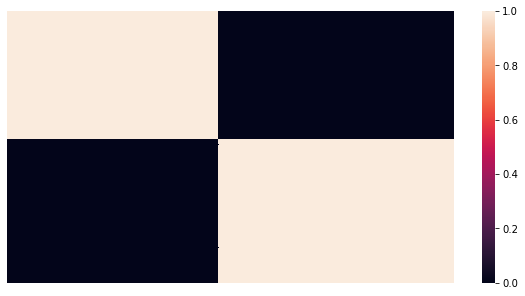

In [71]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [72]:
print('correlation =', correlation(X, y_predict, 'euclidean'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.7361489940502633
total purity = 0.49999999998245614
entropy = 0.4598308653799086
jaccard similarity = 0.10526315789473684


All the different quality metrics are better than the ones obtained considering all the eight classes.

We can say that hierarchical clustering run only on control mice is able to better discriminate among stimulated or not mice - and so those with learning activity or not - even if it is not able to distinguish all the four input classes and this is the reason while the scores remain low.

This suggests that there are indeed differences in protein expression profile between mice with learning activity and those without, while mice with the same activity but different treatment have no clear difference in protein levels.

# KMeans

In [73]:
best_nclusters_KMeans('euclidean','ward')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


In [74]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='ward')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.42631578945869375
Kmeans++ purity 0.42631578945869375
Hierarchical+Kmeans purity 0.4982456140176019


The purity of KMeans is higher when using Hierarchical+Kmeans initialization method.

correlation = 0.7380212342668666
total purity = 0.4982456140176019
entropy = 0.5088386468978429
jaccard similarity = 0.11669566592850364


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


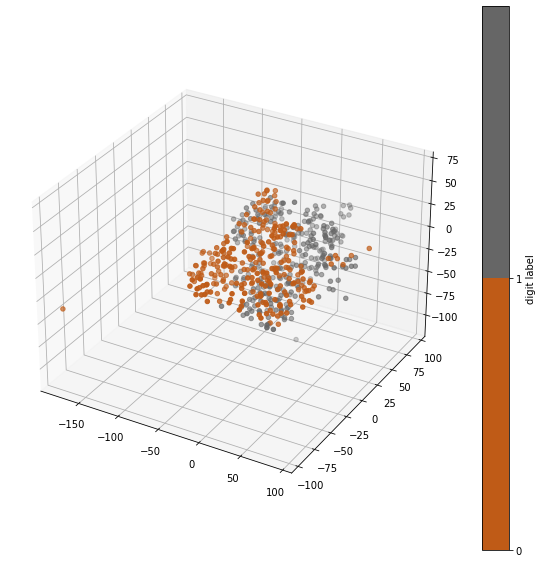

In [75]:
model = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='ward')
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)  
y_predict = model.fit_predict(X)

print('correlation =', correlation(X, y_predict, 'euclidean'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

KMeans allows to obtain two more concentrated and separeted clusters than hierarchical clustering. 

In [76]:
cluster_composition(y,y_predict)

cluster 0 contains:
128 observations of cluster 0
134 observations of cluster 1
6 observations of cluster 3
cluster 1 contains:
22 observations of cluster 0
150 observations of cluster 2
1 observations of cluster 1
129 observations of cluster 3


KMeans result is very similar to the one of agglomerative clustering: one cluster contains above all c-CS classes, while in the other there are mainly c-SC ones. This makes sense since this division reflects the different learning activity.

# DBSCAN

In [77]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.9,1.7,25), 'min_samples': range(10,20)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 1.0666666666666667, 'min_samples': 13}
CV score 0.2578947368372576


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.005093      0.000543         0.004226        0.000171       0.9   
1         0.004497      0.000323         0.003713        0.000278       0.9   
2         0.003871      0.000143         0.003544        0.000379       0.9   
3         0.004076      0.000145         0.003575        0.000232       0.9   
4         0.003992      0.000106         0.003390        0.000146       0.9   
..             ...           ...              ...             ...       ...   
245       0.005504      0.000611         0.004035        0.000263       1.7   
246       0.005540      0.000122         0.004248        0.000033       1.7   
247       0.005479      0.000154         0.004419        0.000660       1.7   
248       0.005513      0.000228         0.004205        0.000029       1.7   
249       0.005179      0.000354         0.003954        0.000260       1.7   

    param_min_samples                           params  split0_test_score  \
0                  10  {'eps': 0.9, 'min_samples': 10}           0.757895   
1                  11  {'eps': 0.9, 'min_samples': 11}           0.436842   
2                  12  {'eps': 0.9, 'min_samples': 12}           0.700000   
3                  13  {'eps': 0.9, 'min_samples': 13}           0.700000   
4                  14  {'eps': 0.9, 'min_samples': 14}           0.389474   
..                ...                              ...                ...   
245                15  {'eps': 1.7, 'min_samples': 15}           0.789474   
246                16  {'eps': 1.7, 'min_samples': 16}           0.789474   
247                17  {'eps': 1.7, 'min_samples': 17}           0.789474   
248                18  {'eps': 1.7, 'min_samples': 18}           0.789474   
249                19  {'eps': 1.7, 'min_samples': 19}           0.789474   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.800000           0.768421         0.775439        0.017891   
1             0.784211           0.768421         0.663158        0.160159   
2             0.784211           0.768421         0.750877        0.036549   
3             0.784211           0.763158         0.749123        0.035783   
4             0.784211           0.747368         0.640351        0.178033   
..                 ...                ...              ...             ...   
245           0.578947           0.710526         0.692982        0.086838   
246           0.578947           0.710526         0.692982        0.086838   
247           0.578947           0.710526         0.692982        0.086838   
248           0.578947           0.710526         0.692982        0.086838   
249           0.578947           0.710526         0.692982        0.086838   

     rank_test_score  
0                 30  
1                240  
2                 42  
3                 43  
4                243  
..               ...  
245              124  
246              124  
247              124  
248              124  
249              124  

[250 rows x 13 columns]

DBSCAN purity 0.2578947368372393
entropy = 0.07836008658784284
jaccard similarity = 0.07257825614693394
Number of outliers 40
   -1    0
0  40  530


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


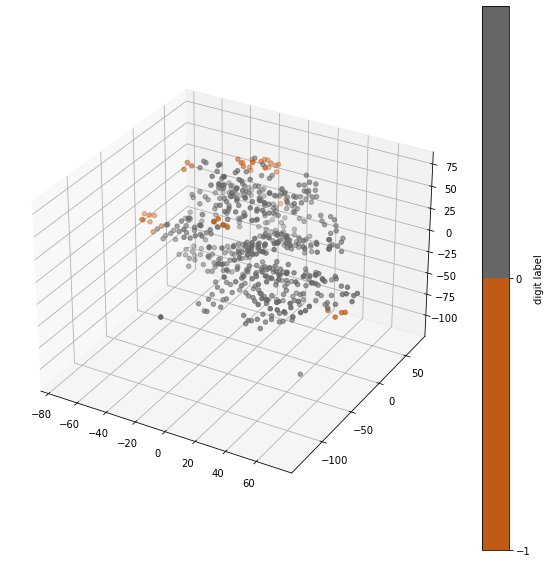

In [78]:
model = DBSCAN(eps=1.06, min_samples=13)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

The purity of DBCSAN, as well as the entropy and the jaccard similarity, are all lower than the ones from the other two clustering algorithms. 
In fact DBSCAN clusters all the observations in a single cluster considering 40 of them outliers: evidently when we try to cluster only the four control classes computing their distance, considering their protein expression profile, is better than considering their density or connectivity.

## Subset of proteins

After having performed the clustering using all the 77 proteins the authors of the article repeated the analysis considering only a subset of them: 11 proteins found - from Wilcoxon-rank sum test - to be significantly different in all four comparisons related to successful learning plus the 13 proteins that describe memantine effects on the initial protein profiles - c-SC-m vs c-SC-s.

Their result revealed that the c-CS and c-SC mice are clearly separated and the separation between c-SC-s and c-SC-m was improved since there were no mixed SC nodes. 
However, for c-CS-s and c-CS-m nodes, there are now more mixed nodes. This reflects the fact that some of the proteins that discriminate between c-SC-m and c-SC-s have similar values in, and do not discriminate between, c-CS-m and c-CS-s.

In [79]:
eleven_proteins = ['pBRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_Tyr216_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']

thirteen_proteins = ['pCAMKII_N', 'pPKCG_N', 'ELK_N', 'pS6_N', 'AKT_N', 'pNR1_N', 'NR1_N', 'ARC_N', 'BCL2_N', 'H3AcK18_N', 'Ubiquitin_N']
# there are also SOD1 and pNUMB but they are already present in eleven_proteins list

not_wanted = [prot for prot in columns if prot not in eleven_proteins + thirteen_proteins]

df_control = df_control.drop(not_wanted, axis=1)

df_control.shape

(570, 23)

In [80]:
# extract the expression values of each protein in all the mice
X = df_control.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_control['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (570, 22)
y shape = (570,)


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


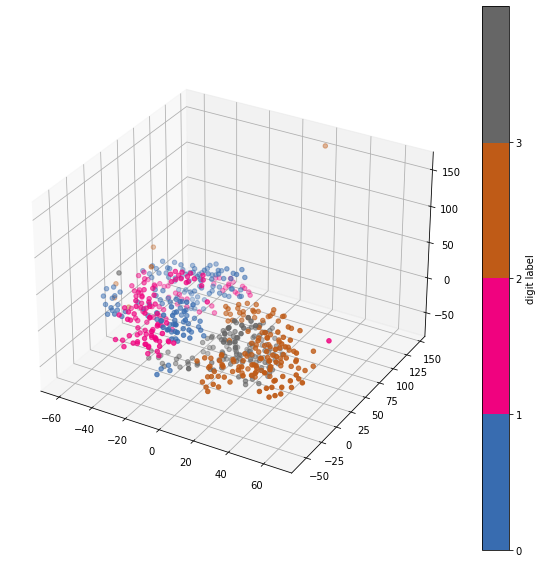

In [81]:
plot3d(X, labels=y)

From TSNE visualization of the four classes of control mice, considering only a subset of proteins, we can see that the two c-CS classes (0 and 1) are farther from the two c-SC ones (2 and 3) with respect to how they appeared in the result obtained using hierarchical clustering on the four control classes but considering all 77 proteins. Furthermore the two c-SC classes (2 and 3) seem better separeted.

# Hierachical clustering by building the Linkage Matrix

In [82]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7532760635490534
total purity = 0.526315789455217

cityblock
best number of clusters: 2
correlation = 0.867715739441795
total purity = 0.3736842105100411

correlation
best number of clusters: 2
correlation = 0.9228554768477999
total purity = 0.3385964912105331

minkowski
best number of clusters: 2
correlation = 0.9410091724806365
total purity = 0.3140350877038641



The euclidean distance is the one that performs better both considering the overall purity and the correlation. The best number of clusters obtained using this metric is 2. 

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

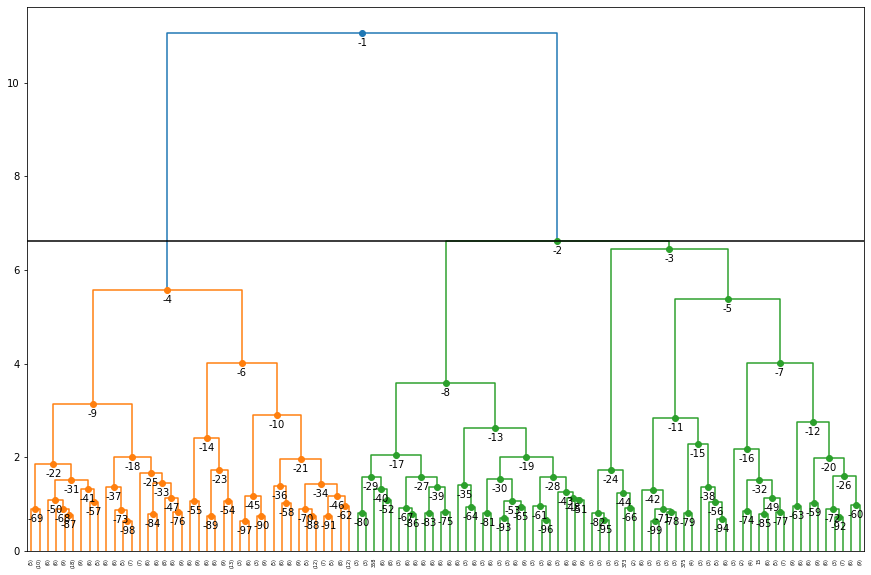

In [83]:
Z = linkage(X, metric='euclidean',method='ward')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [84]:
plot_node(Z, X.reshape(-1, 22), y, -4)

              2    3
Frequency:  150  135
Items in the cluster: 285 / 570


In [85]:
plot_node(Z, X.reshape(-1, 22), y, -2)

              0    1
Frequency:  150  135
Items in the cluster: 285 / 570


We can see that in cluster -4 there are only c-SC mice, while in cluster -2 there are only c-CS ones. 
This suggests that this subset of proteins are differentially expressed between mice with learning activity and those without and thus allow hierarchical clustering algorithm to clearly disciminate among them.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

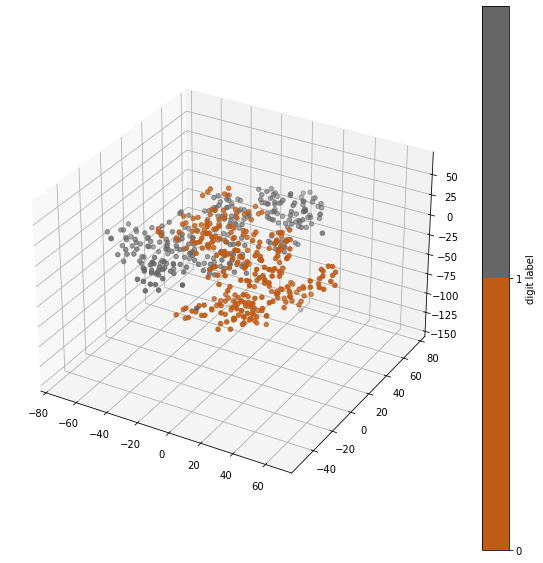

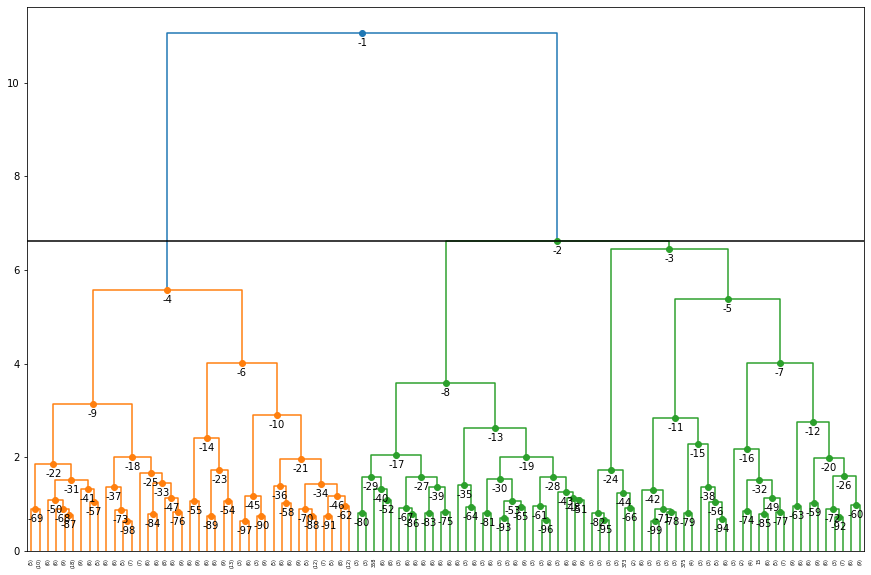

In [86]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

From TSNE visualization of the result of Agglomerative clustering we can see that the two clusters - one containing c-CS mice and the other c-SC ones - are well separted and condensed.  

# Evaluation

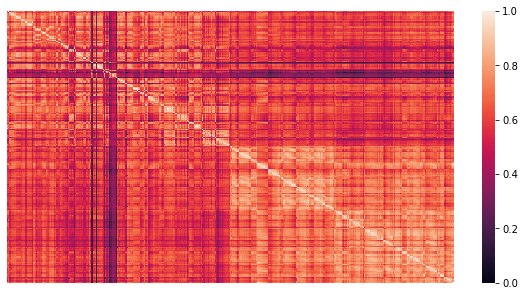

In [87]:
sim = similarity_mat(X, 'euclidean')
plot_sorted_mat(sim, y_predict)

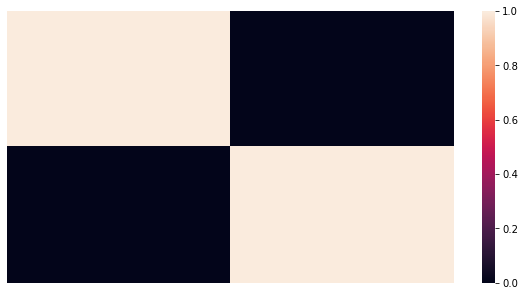

In [88]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [89]:
print('correlation =', correlation(X, y_predict, 'euclidean'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.7532760635490534
total purity = 0.526315789455217
entropy = 0.6671112109269115
jaccard similarity = 0.13850415512465375


All the evaluation metrics are higher than the ones obtained considering all the 77 proteins for the four classes of control mice.

We can say that agglomerative clustering algorithm improves a lot in clustering the four control classes when considering only this subset of proteins, in particular it is able to discriminate those stimulated from those not stimulated.

# KMeans

In [90]:
best_nclusters_KMeans('euclidean','ward')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


In [91]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='ward')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.5157894736661124
Kmeans++ purity 0.5157894736661124
Hierarchical+Kmeans purity 0.5157894736661124


KMeans algorithm perform better than how it did when considering all the 77 proteins independently from the initialization method.

correlation = 0.7546356530333491
total purity = 0.5157894736661124
entropy = 0.624428761112085
jaccard similarity = 0.11823078274105733


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


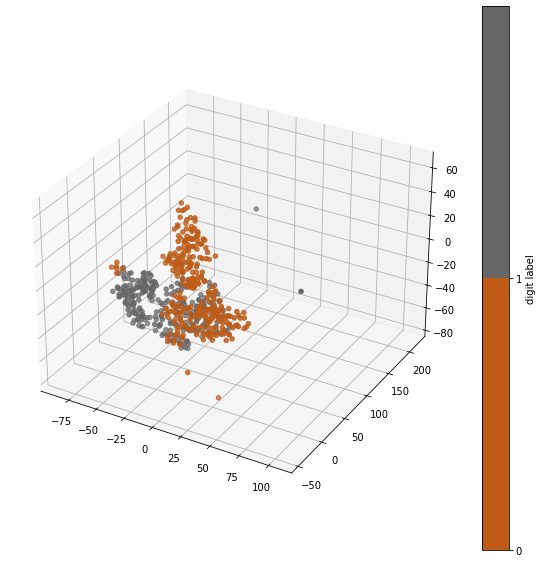

In [92]:
model = KMeans(n_clusters=2, init='random', random_state=0)             
y_predict = model.fit_predict(X)

print('correlation =', correlation(X, y_predict, 'euclidean'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

In [93]:
cluster_composition(y,y_predict)

cluster 0 contains:
6 observations of cluster 0
150 observations of cluster 2
135 observations of cluster 3
cluster 1 contains:
144 observations of cluster 0
135 observations of cluster 1


The compositions of the different clusters obtained by KMeans is equal to the one of agglomerative clustering.
Also TSNE visualization returns the same result.

The performance of KMeans is comparable with the one of agglomerative clustering when run on the four control classes and a subset of proteins.

# DBSCAN

In [94]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.3,1.5,25), 'min_samples': range(10,20)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 0.5499999999999999, 'min_samples': 16}
CV score 0.26315789473203993


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.004130      0.000376         0.009138        0.007864       0.3   
1         0.004905      0.000926         0.004511        0.000359       0.3   
2         0.004838      0.000416         0.004154        0.000186       0.3   
3         0.004518      0.000299         0.004070        0.000296       0.3   
4         0.003600      0.000111         0.003327        0.000022       0.3   
..             ...           ...              ...             ...       ...   
245       0.005672      0.000410         0.004438        0.000485       1.5   
246       0.005153      0.000030         0.004334        0.000296       1.5   
247       0.005189      0.000055         0.004162        0.000088       1.5   
248       0.005183      0.000040         0.004088        0.000040       1.5   
249       0.005209      0.000036         0.004096        0.000013       1.5   

    param_min_samples                           params  split0_test_score  \
0                  10  {'eps': 0.3, 'min_samples': 10}           0.110526   
1                  11  {'eps': 0.3, 'min_samples': 11}           0.157895   
2                  12  {'eps': 0.3, 'min_samples': 12}           0.078947   
3                  13  {'eps': 0.3, 'min_samples': 13}           0.068421   
4                  14  {'eps': 0.3, 'min_samples': 14}           0.000000   
..                ...                              ...                ...   
245                15  {'eps': 1.5, 'min_samples': 15}           0.789474   
246                16  {'eps': 1.5, 'min_samples': 16}           0.789474   
247                17  {'eps': 1.5, 'min_samples': 17}           0.789474   
248                18  {'eps': 1.5, 'min_samples': 18}           0.789474   
249                19  {'eps': 1.5, 'min_samples': 19}           0.789474   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.242105           0.442105         0.264912        0.136324   
1             0.215789           0.436842         0.270175        0.120198   
2             0.194737           0.436842         0.236842        0.149112   
3             0.194737           0.300000         0.187719        0.094672   
4             0.184211           0.294737         0.159649        0.121573   
..                 ...                ...              ...             ...   
245           0.578947           0.710526         0.692982        0.086838   
246           0.578947           0.710526         0.692982        0.086838   
247           0.578947           0.710526         0.692982        0.086838   
248           0.578947           0.710526         0.692982        0.086838   
249           0.578947           0.710526         0.692982        0.086838   

     rank_test_score  
0                242  
1                241  
2                243  
3                244  
4                246  
..               ...  
245               47  
246               47  
247               47  
248               47  
249               47  

[250 rows x 13 columns]

DBSCAN purity 0.26315789473202233
entropy = 0.05951824591078258
jaccard similarity = 0.07046304285303423
Number of outliers 24
   -1    0
0  24  546


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


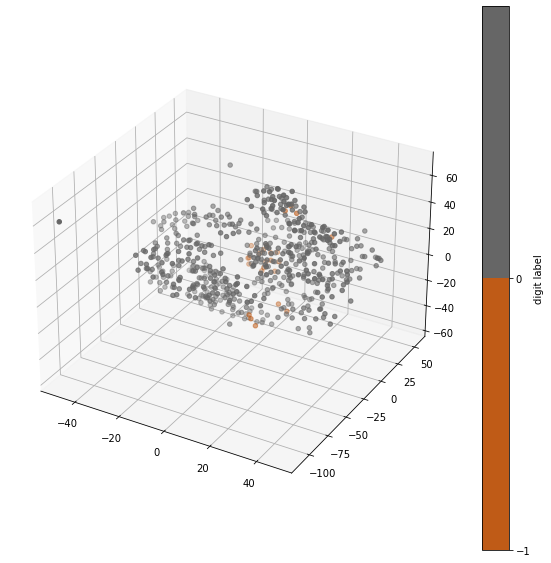

In [95]:
model = DBSCAN(eps=0.54, min_samples=16)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

DBSCAN performs very bad on the four classes of control mice considering only a subset of proteins: all the evaluation metrics are significantly lower than the ones of agglomerative clustering and KMeans, plus all the mice are clustered as of the same class with the exception of 24 outliers.

From this result we can understand that these four classes of mice - that we expect clearly distinguishable between those with learning activity and those without by this set of proteins - can't be discriminated using an algorithm based on the density and connectivity notions but only on the distance basis.

# Clustering generated only with groups of trisomic mice to examine failed learning and its rescue by memantine

Remember that:
- trisomic mice stimulated to learn injected with saline (t-CS-s) fail in learing;
- learning is rescued in trisomic mice stimulated to learn injected with memantine (t-CS-m);
- trisomic mice not stimulated to learn either injected with saline or memantine (t-SC-s and t-SC-m) have no learning ability.

The authors of the article report as result of this analysis that:

- t-SC mice are well separated from t-CS; 
- mice in t-SC-s and t-SC-m classes are also completely separated.
- the organization of t-CS clusters is more complicated and differently from the clustering result obtained for control mice - where c-CS classes are not well separeted - the t-CS-s mice that fail to learn are near to SC nodes. This difference suggests that protein levels in trisomic mice that, once stimulated, failed learning are more similar to those of t-SC-s mice (not stimulated to learn) than they are to those in control mice in successful learning.
- there are CS-s and CS-m mixed nodes suggesting that trisomic mice that, once stimulated to learn, failed more closely resemble rescued learning.

In [96]:
# extract the expression values only of the four classes of trisomic mice
index = []
for cl in range(4):
    index = index + df[df['class'] == cl].index.to_list()
    
df_trisomy = df.drop(index)
    
df_trisomy.shape

(507, 78)

In [97]:
df_trisomy.index = range(507)

I replace the class identification of the four trisomic mice classes - 4, 5, 6 and 7 - with the numbers from 0 to 3 to make easier the computations of the evaluation scores:

- t-CS-m -> 0
- t-CS-s -> 1
- t-SC-m -> 2
- t-SC-s -> 3

In [98]:
df_trisomy['class'] = df_trisomy['class'].replace([4,5,6,7],range(4))

In [99]:
# extract the expression values of each protein in all the mice
X = df_trisomy.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_trisomy['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (507, 77)
y shape = (507,)


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


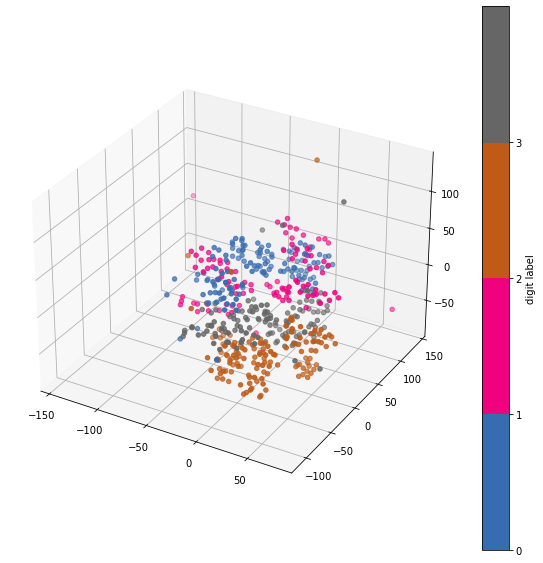

In [100]:
plot3d(X, labels=y)

From the visualization along the first three TSNE components of the four trisomic classes we can see that they are quite spread and the separation between t-SC (class 2 and 3) and t-CS (class 0 and 1) mice is slight. The two t-SC classes are better split than the two t-CS ones but indeed the four classes are rather mixed.

# Hierachical clustering by building the Linkage Matrix

In [101]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7859377910780254
total purity = 0.42011834317815655

cityblock
best number of clusters: 2
correlation = 0.751291861304888
total purity = 0.44970414199420644

correlation
best number of clusters: 2
correlation = 0.8815771314070072
total purity = 0.32544378696770226

minkowski
best number of clusters: 2
correlation = 0.8049641351667427
total purity = 0.40631163706371076



Cityblock distance is the one that performs better both considering the overall purity and the correlation. According to them the best number of clusters is 2.

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

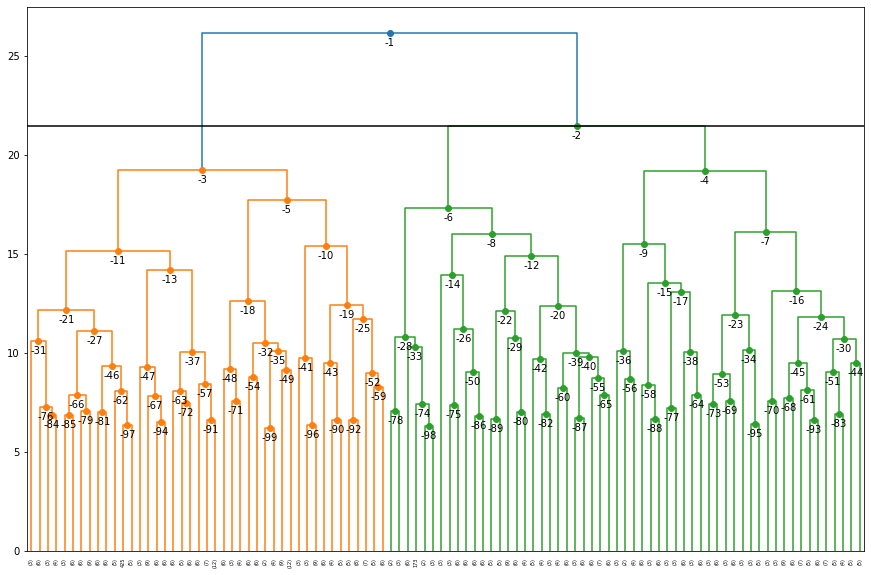

In [102]:
Z = linkage(X, metric='cityblock',method='complete')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [103]:
plot_node(Z, X.reshape(-1, 77), y, -2)

             0   1    2   3
Frequency:  42  27  135  61
Items in the cluster: 265 / 507


In [104]:
plot_node(Z, X.reshape(-1, 77), y, -3)

             0   1   3
Frequency:  93  78  71
Items in the cluster: 242 / 507


We can see that in cluster -2 there are above all mice of classes t-SC-m, while in cluster -3 there are only observations of the two t-CS classes and of t-SC-s one.

This result is quite unexpected since all trisomic mice don't show learning activity with exception of t-CS-m ones - that consequently are the only expected to have a different protein expression profile. Nevertheless t-CS-m mice are mixed with all the others.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

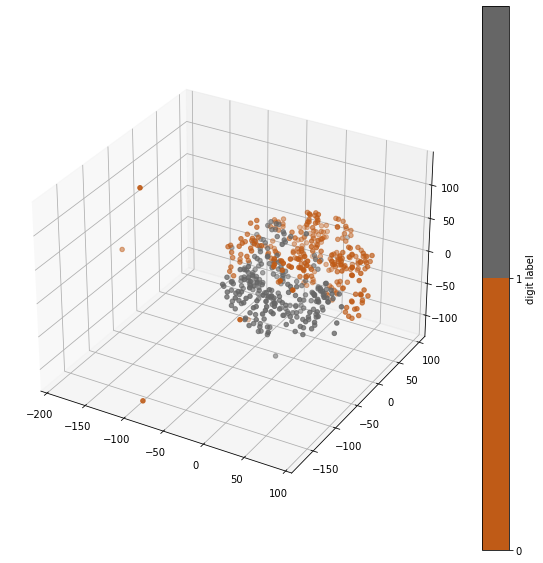

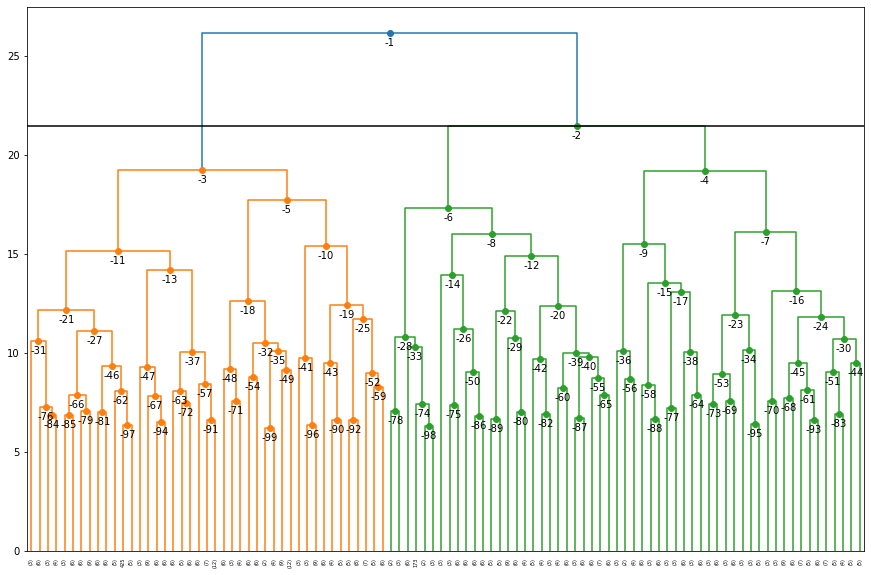

In [105]:
model = AgglomerativeClustering(n_clusters=2, affinity='cityblock', linkage='complete')

y_predict = model.fit_predict(X)
    
plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

From the result obtained using the built-in Agglomerative Clustering algorithm of sklearn we can see that the two clusters are quite well separeted but we know that they contain a mix of observations of the four different trisomic mice.

# Evaluation

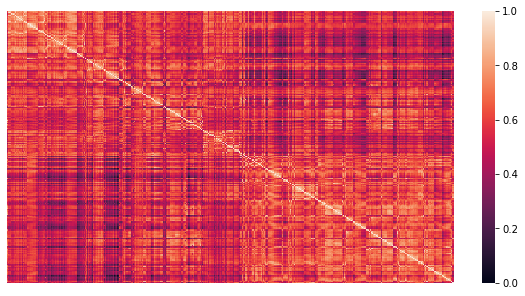

In [106]:
sim = similarity_mat(X, 'cityblock')
plot_sorted_mat(sim, y_predict)

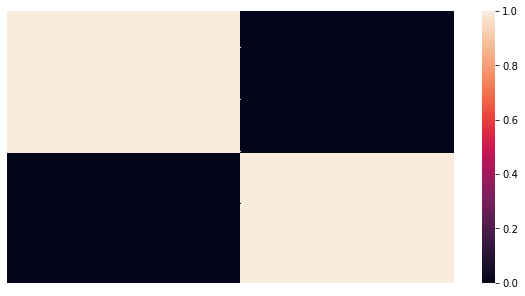

In [107]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [108]:
print('correlation =', correlation(X, y_predict, 'cityblock'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.751291861304888
total purity = 0.44970414199420644
entropy = 0.2211587687582218
jaccard similarity = 0.09129010943015924


From these scores, but above all from the analysis of the composition of the two clusters in which is better to devide the mice of the four trisomic classes, I think that hierarchical clustering algorithm is not able to catch the difference between the only trisomic class with learning ability, the t-CS-m, and the other three classes that are not stimulated or fail in learning.

# KMeans

In [109]:
best_nclusters_KMeans('cityblock','complete')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


In [110]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='cityblock', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.4733727810463574
Kmeans++ purity 0.4595660749325995
Hierarchical+Kmeans purity 0.4674556212833765


KMeans has the highest total purity with random initialization.

correlation = 0.7597636070471858
entropy = 0.2282311080920846
jaccard similarity = 0.11688513915234562


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


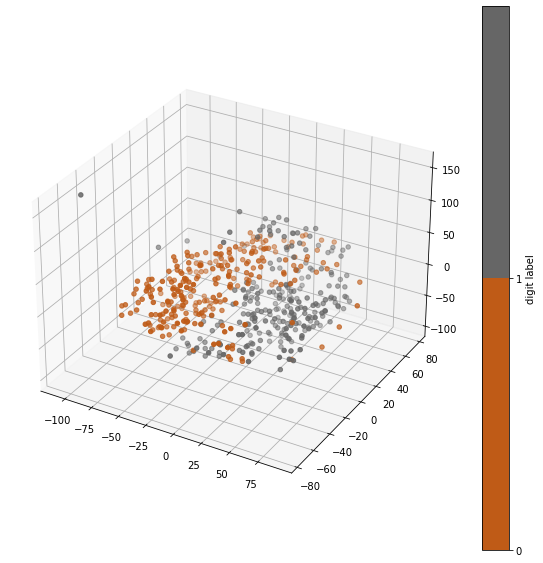

In [111]:
model = KMeans(n_clusters=2, init='random', random_state=0)     
# initialize method is how I set the first clusters: randomly or with other methods
y_predict = model.fit_predict(X)
print('correlation =', correlation(X, y_predict, 'cityblock'))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

In [112]:
cluster_composition(y,y_predict)

cluster 0 contains:
111 observations of cluster 0
6 observations of cluster 2
84 observations of cluster 1
60 observations of cluster 3
cluster 1 contains:
24 observations of cluster 0
129 observations of cluster 2
21 observations of cluster 1
72 observations of cluster 3


We can see that in one cluster there are above all mice of class t-SC-m, while in the other cluster there are mainly observations of the two t-CS classes and of t-SC-s one.

Both considering the evaluation scores and the cluster composition resulting from KMeans, it doesn't seem better than hierarchical clustering in discriminating the only trisomic class with rescued learning activity from the other three without: t-CS-m mice remain not strongly sperareted from the others.

# DBSCAN

In [113]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.9,1.7,25), 'min_samples': range(10,20)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 1.2, 'min_samples': 16}
CV score 0.2662721893438501


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.003441      0.000764         0.002860        0.000385       0.9   
1         0.002801      0.000014         0.002560        0.000020       0.9   
2         0.002805      0.000040         0.002557        0.000005       0.9   
3         0.003450      0.000445         0.002680        0.000078       0.9   
4         0.002897      0.000077         0.002690        0.000121       0.9   
..             ...           ...              ...             ...       ...   
245       0.004125      0.000295         0.003678        0.000244       1.7   
246       0.004575      0.000088         0.004092        0.000246       1.7   
247       0.004722      0.000648         0.003853        0.000413       1.7   
248       0.004591      0.000099         0.003901        0.000008       1.7   
249       0.004547      0.000034         0.004153        0.000393       1.7   

    param_min_samples                           params  split0_test_score  \
0                  10  {'eps': 0.9, 'min_samples': 10}           0.869822   
1                  11  {'eps': 0.9, 'min_samples': 11}           0.869822   
2                  12  {'eps': 0.9, 'min_samples': 12}           0.846154   
3                  13  {'eps': 0.9, 'min_samples': 13}           0.822485   
4                  14  {'eps': 0.9, 'min_samples': 14}           0.822485   
..                ...                              ...                ...   
245                15  {'eps': 1.7, 'min_samples': 15}           0.798817   
246                16  {'eps': 1.7, 'min_samples': 16}           0.798817   
247                17  {'eps': 1.7, 'min_samples': 17}           0.798817   
248                18  {'eps': 1.7, 'min_samples': 18}           0.798817   
249                19  {'eps': 1.7, 'min_samples': 19}           0.798817   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.562130           0.958580         0.796844        0.169877   
1             0.562130           0.958580         0.796844        0.169877   
2             0.568047           0.946746         0.786982        0.160165   
3             0.597633           0.928994         0.783037        0.138123   
4             0.597633           0.923077         0.781065        0.136052   
..                 ...                ...              ...             ...   
245           0.597633           0.781065         0.725838        0.090944   
246           0.597633           0.781065         0.725838        0.090944   
247           0.597633           0.781065         0.725838        0.090944   
248           0.597633           0.781065         0.725838        0.090944   
249           0.597633           0.781065         0.725838        0.090944   

     rank_test_score  
0                 29  
1                 29  
2                 61  
3                 65  
4                 67  
..               ...  
245              129  
246              129  
247              129  
248              129  
249              129  

[250 rows x 13 columns]

DBSCAN purity 0.2662721893438501
entropy = 0.0044619761742439425
jaccard similarity = 0.07104099913464464
Number of outliers 1
   -1    0
0   1  506


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


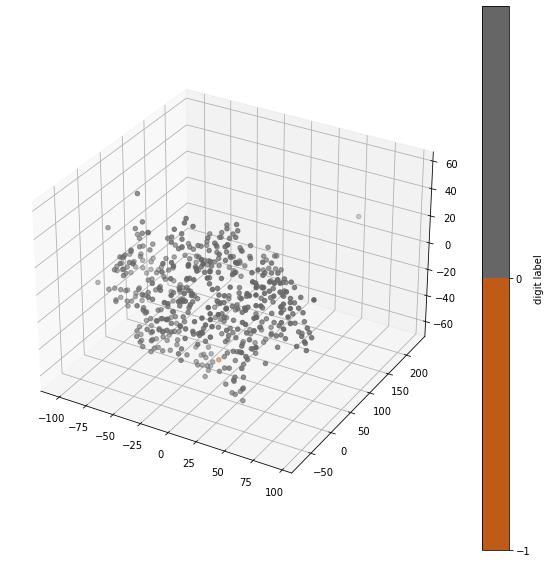

In [114]:
model = DBSCAN(eps=1.2, min_samples=16)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

DBSCAN doesn't perform well on the data regarding the four trisomic classes: all the quality metrics are largely lower than the ones of agglomerative clustering and KMeans and in fact we can see that all the observations are clustered in one big cluster with a single outlier.

Once more, as seen looking at the performance of DBSCAN on the four classes of control mice using all 77 proteins,  density and connectivity between observations don't allow to divide them according to the different learning activity.

# Subset of proteins

After having performed the clustering using all the 77 proteins the authors of the article repeated the analysis considering only a subset of them: 15 proteins found by Wilcoxon-rank sum test to be significantly different in both the two comparisons that reflected rescued learning: t-CS-m vs t-SC-m and t-CS-m vs t-SC-s. Plus the 12 proteins that - from Wilcoxon-rank sum test - describe memantine effects on the initial protein profiles - t-SC-m vs t-SC-s.

In this way they achieved a better result than the one obtained considering the 77 proteins: t-CS and t-SC mice are separeted and all the measurements of the t-SC-s and t-SC-m classes are completely discriminated in two different clusters. 

In [115]:
fifteen_proteins = ['BRAF_N', 'pERK_N', 'pMEK_N', 'P38_N', 'MTOR_N', 'AKT_N', 'CaNA_N', 'SNCA_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'EGR1_N', 'H3AcK18_N', 'H3MeK4_N', 'Ubiquitin_N']

twelve_proteins = ['pPKCAB_N', 'pPKCG_N', 'pMTOR_N', 'S6_N', 'pS6_N', 'pP70S6_N', 'P3525_N', 'ERBB4_N', 'pNR2A_N', 'ARC_N', 'BAD_N']
# SNCA is present already in fifteen_proteins list

not_wanted = [prot for prot in columns if prot not in fifteen_proteins + twelve_proteins]

df_trisomy2 = df_trisomy.drop(not_wanted, axis=1)

df_trisomy2.shape

(507, 27)

In [116]:
# extract the expression values of each protein in all the mice
X = df_trisomy2.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_trisomy2['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (507, 26)
y shape = (507,)


Notice that even in this case the class identifications are different than the beginning:

- t-CS-m -> 0
- t-CS-s -> 1
- t-SC-m -> 2
- t-SC-s -> 3

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


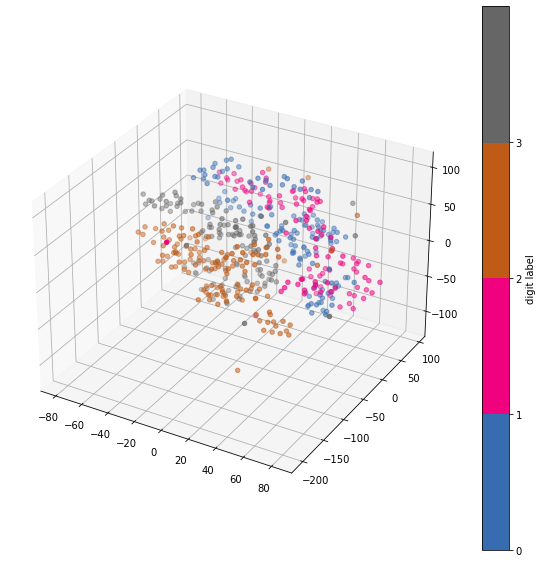

In [117]:
plot3d(X, labels=y)

From TSNE visualization of the four classes of trisomic mice, considering only a subset of proteins, we can see that the separation between the two t-CS classes (0 and 1) and the two t-SC ones (2 and 3) is more evident than when considering all the 77 proteins and the discrimination between the two t-SC classes is stronger.  

# Hierachical clustering by building the Linkage Matrix

In [118]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7841106289054913
total purity = 0.5325443786769481

cityblock
best number of clusters: 2
correlation = 0.7899985092602074
total purity = 0.5325443786771935

correlation
best number of clusters: 2
correlation = 0.7777198968938427
total purity = 0.5325443786770921

minkowski
best number of clusters: 3
correlation = 0.6808365271865133
total purity = 0.6528599605124554



Minkowski distance is the one that performs better both considering the overall purity and the correlation. The best number of clusters obtained using this metric is 3.

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

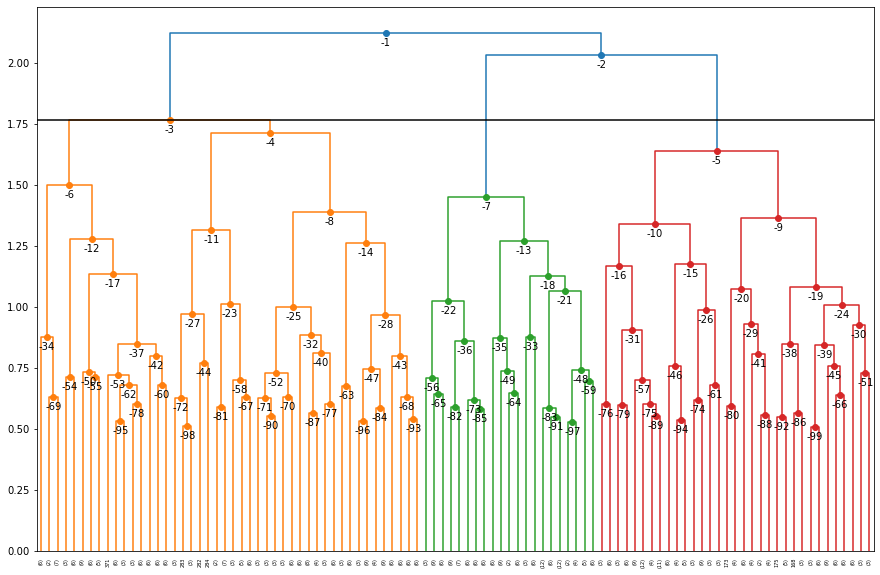

In [119]:
Z = linkage(X, metric='minkowski',method='complete')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=3)

In [120]:
plot_node(Z, X.reshape(-1, 26), y, -3)
plot_node(Z, X.reshape(-1, 26), y, -5)
plot_node(Z, X.reshape(-1, 26), y, -7)

             0   1    3
Frequency:  46  63  107
Items in the cluster: 216 / 507
              2   3
Frequency:  135  25
Items in the cluster: 160 / 507
             0   1
Frequency:  89  42
Items in the cluster: 131 / 507


We can see that in cluster -3 there are above all mice of t-SC-s class but also lot of t-CS ones, in cluster -5 there are only t-SC mice with strong prevalence of t-SC-m ones, in cluster -7 there are only t-CS mice with higher frequency of t-CS-m ones.

This is coherent with the result of the article in which t-CS and t-SC classes are separeted, even if the two t-SC groups are not so well discriminated and t-CS-m mice, the only with learning ability, are not strongly clustered apart.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

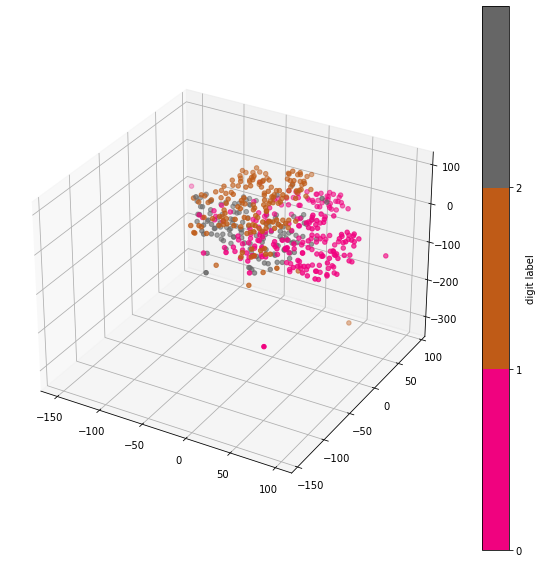

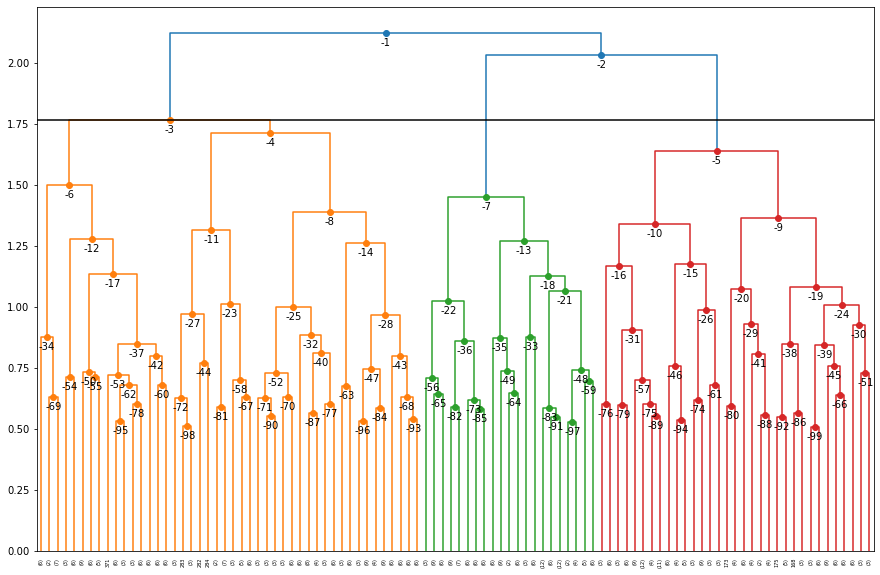

In [121]:
model = AgglomerativeClustering(n_clusters=3, affinity='minkowski', linkage='complete')

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=3, 
                color_threshold=distance_threshold)

The result obtained using the built-in Agglomerative Clustering algorithm of sklearn shows three clusters that are rather condensed but not well separeted. We know that one contains only mice with no learning activity, another contains only t-CS mice and the last one contains both c-CS classes and above all t-SC-s ones.

# Evaluation

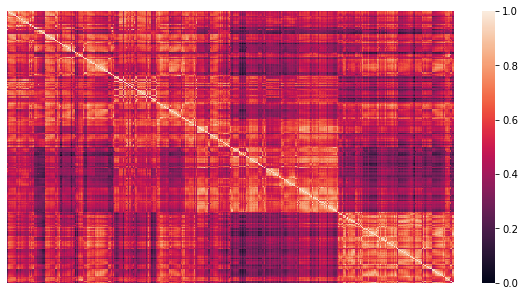

In [122]:
sim = similarity_mat(X, 'minkowski')
plot_sorted_mat(sim, y_predict)

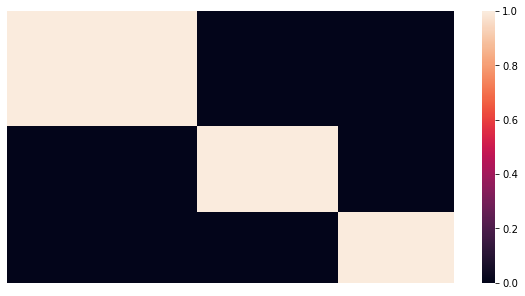

In [123]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [124]:
print('correlation =', correlation(X, y_predict, 'minkowski'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.6808365271865133
total purity = 0.6528599605124554
entropy = 0.5211673208754057
jaccard similarity = 0.040159084295275975


The correlation and the jaccard similarity are worse than the ones obtained by the same algorithm considering all the proteins, instead the total purity and the entropy are very much increased.

From cluster composition we saw that it is true that t-CS classes are quite separeted from t-SC ones but the hierarchical clustering algorithm doesn't seem able to well discriminate the only class with rescued learning activity, the t-CS-m class, from the other three without this ability using the expression of this subset of proteins.

# KMeans

In [125]:
best_nclusters_KMeans('minkowski','complete')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 3


In [126]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=3, 
                                 distance_threshold=distance_threshold, 
                                 affinity='minkowski', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.5266272189141166
Kmeans++ purity 0.5266272189141166
Hierarchical+Kmeans purity 0.6528599605131477


KMeans total purity is higher than whan considering all 77 proteins and the best initialization method is Hierarchical+Kmeans.

correlation = 0.6819200558110935
entropy = 0.5129746967329318
jaccard similarity = 0.037365197052202336


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


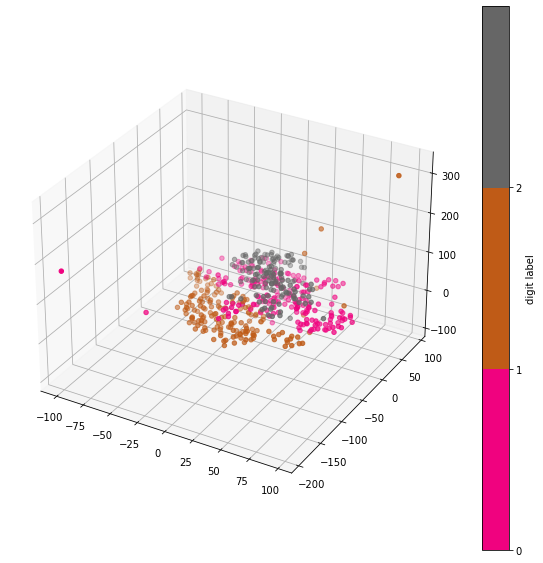

In [127]:
model = AgglomerativeClustering(n_clusters=3, 
                                 distance_threshold=distance_threshold, 
                                 affinity='minkowski', linkage='complete')
centroids = np.stack([X[y_predict==k].mean(0) for k in range(3)])
model = KMeans(n_clusters=3, init=centroids, n_init=1, random_state=0)  
y_predict = model.fit_predict(X)
         
print('correlation =', correlation(X, y_predict, 'minkowski'))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

In [128]:
cluster_composition(y,y_predict)

cluster 0 contains:
40 observations of cluster 0
55 observations of cluster 1
101 observations of cluster 3
cluster 1 contains:
135 observations of cluster 2
1 observations of cluster 1
31 observations of cluster 3
cluster 2 contains:
95 observations of cluster 0
49 observations of cluster 1


One cluster contains only t-CS classes, another contains above all t-SC-s mice and also t-CS but with half of t-SC-s frequency, the third cluster contains mainly t-SC-m observations.
This is coherent with the result of the article since t-CS and t-SC classes are rather separeted and also the two t-SC classes are well discriminated among them.

Considering these clusters' composition and also the different evaluation scores KMeans, as hierarchical clustering, results not able to discriminate among the t-CS-m mice - those with rescued learning activity - and the three trisomic classes with no learning skill and above all this subset of proteins is not helpful in doing so. But they are both able to cluster apart trisomic mice that had been stimulated from those who didn't and KMeans is also able to well discriminate among the two t-SC classes.

# DBSCAN

In [129]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.3,1.5,25), 'min_samples': range(5,10)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)
# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 0.7, 'min_samples': 7}
CV score 0.2662721893438501


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.004853      0.000396         0.004839        0.000928       0.3   
1         0.003606      0.000177         0.003622        0.000286       0.3   
2         0.002948      0.000141         0.003144        0.000377       0.3   
3         0.003926      0.000813         0.003902        0.000458       0.3   
4         0.003044      0.000238         0.003243        0.000537       0.3   
..             ...           ...              ...             ...       ...   
120       0.004636      0.000040         0.004010        0.000093       1.5   
121       0.004774      0.000078         0.004250        0.000173       1.5   
122       0.004732      0.000077         0.004296        0.000231       1.5   
123       0.004765      0.000013         0.004448        0.000155       1.5   
124       0.005248      0.000426         0.004303        0.000248       1.5   

    param_min_samples                          params  split0_test_score  \
0                   5  {'eps': 0.3, 'min_samples': 5}           0.331361   
1                   6  {'eps': 0.3, 'min_samples': 6}           0.331361   
2                   7  {'eps': 0.3, 'min_samples': 7}           0.313609   
3                   8  {'eps': 0.3, 'min_samples': 8}           0.313609   
4                   9  {'eps': 0.3, 'min_samples': 9}           0.313609   
..                ...                             ...                ...   
120                 5  {'eps': 1.5, 'min_samples': 5}           0.798817   
121                 6  {'eps': 1.5, 'min_samples': 6}           0.798817   
122                 7  {'eps': 1.5, 'min_samples': 7}           0.798817   
123                 8  {'eps': 1.5, 'min_samples': 8}           0.798817   
124                 9  {'eps': 1.5, 'min_samples': 9}           0.798817   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.100592           0.106509         0.179487        0.107418   
1             0.094675           0.112426         0.179487        0.107635   
2             0.094675           0.112426         0.173570        0.099288   
3             0.136095           0.124260         0.191321        0.086606   
4             0.112426           0.106509         0.177515        0.096264   
..                 ...                ...              ...             ...   
120           0.597633           0.781065         0.725838        0.090944   
121           0.597633           0.781065         0.725838        0.090944   
122           0.597633           0.781065         0.725838        0.090944   
123           0.597633           0.781065         0.725838        0.090944   
124           0.597633           0.781065         0.725838        0.090944   

     rank_test_score  
0                122  
1                122  
2                125  
3                121  
4                124  
..               ...  
120               46  
121               46  
122               46  
123               46  
124               46  

[125 rows x 13 columns]

DBSCAN purity 0.2662721893438501
entropy = 0.0044619761742439425
jaccard similarity = 0.07104099913464464
Number of outliers 1
   -1    0
0   1  506


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


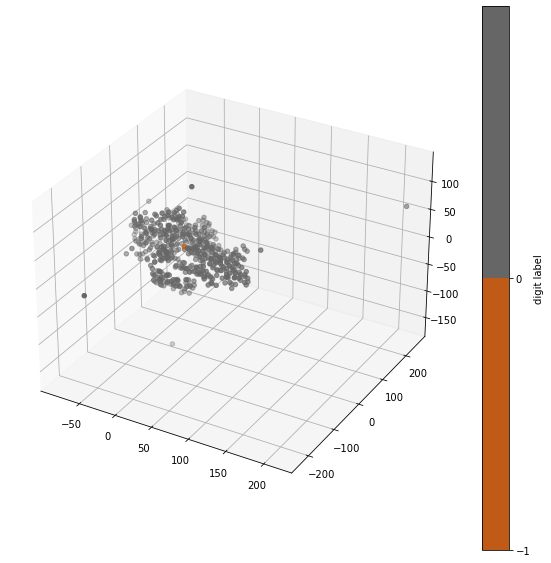

In [130]:
model = DBSCAN(eps=0.7, min_samples=7)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

DBSCAN performs very bad on the four classes of trisomic mice considering only a subset of proteins: all the evaluation metrics are significantly lower than the ones of agglomerative clustering and KMeans, plus all the mice are clustered as of the same class with the exception of a single outlier.

From this result we can understand that these four classes of mice can't be discriminated using an algorithm based on the density and connectivity notions but they can be better clustered only on the distance basis.

# Clustering generated with combinations of control and trisomic groups to examine differences in learning caused by trisomy

Eventually the article reports the result of the clustering performed on t-CS-s (failed learning), c-CS-s (normal learning) and c-CS-m (normal learning after memantine) considering a subset of proteins: the 10 proteins that - from the Wilcoxon-rank sum test - significantly differ between t-CS-s and c-CS-s and at the same time differ in levels between t-CS-s with c-CS-m.

As result they obtained that the t-CS-s mice are found in a single large cluster completely separated from c-CS-s and c-CS-m. This suggests that these 10 proteins are those expressed only when there is a learning ability and thus able to critically discriminate between successful learning and lack of learning activity. 

As a further test, they used the same 10 proteins to cluster t-CS-m (rescued learning) with the two classes of successful learning in control mice - c-CS-m and c-CS-s. 
What they saw is that 40% of the t-CS-m measurements are mixed with c-CS-s or c-CS-m or both of them. This suggests that abnormal levels of these 10 proteins are critical to failed learning, and that memantine treatment induces changes in these responses that not only result in rescued learning, but also in a protein profile that is not distinguished from those of normal successful learning.

## t-CS-s (failed learning), c-CS-s (normal learning) and c-CS-m (normal learning after memantine) clustering with a subset of 10 proteins

In [131]:
# extract the expression values only of the three classes of interest
index = []
for cl in [2, 3, 4, 6, 7]:
    index = index + df[df['class'] == cl].index.to_list()
    
df_mix = df.drop(index)
    
df_mix.shape

(390, 78)

In [132]:
df_mix.index = range(390)

I replace the class identification of the three classes of interest - 0, 1 and 5 - with the numbers from 0 to 2 to make easier the computations of the evaluation scores:

- c-CS-m -> 0
- c-CS-s -> 1
- t-SC-s -> 2

In [133]:
df_mix['class'] = df_mix['class'].replace([0,1,5],range(3))

In [134]:
ten_proteins = ['pNR1_N', 'APP_N', 'MTOR_N', 'P38_N', 'NR2B_N', 'RAPTOR_N', 'S6_N', 'Tau_N', 'GluR3_N', 'EGR1_N']

not_wanted = [prot for prot in columns if prot not in ten_proteins]

df_mix_reduced = df_mix.drop(not_wanted, axis=1)

df_mix_reduced.shape

(390, 11)

In [135]:
# extract the expression values of each protein in all the mice
X = df_mix_reduced.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_mix_reduced['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (390, 10)
y shape = (390,)


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


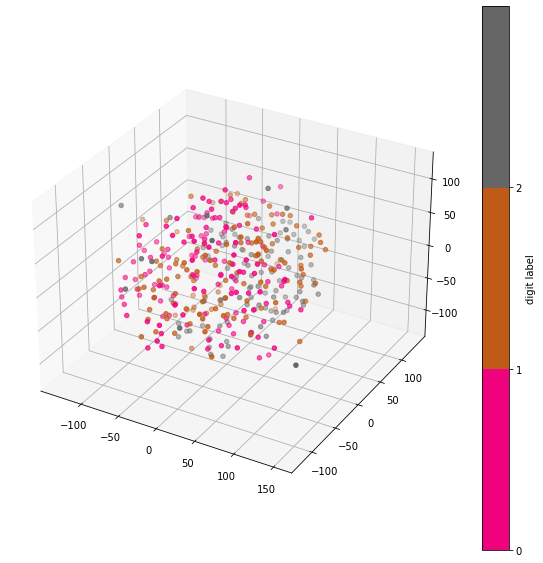

In [136]:
plot3d(X, labels=y)

From TSNE visualization of the c-CS-m, c-CS-s and t-CS-s classes, considering only a subset of proteins, we can see that, even if they are all spread, the observations of t-CS-s class (class 2) are all concentrated at one side.

# Hierachical clustering by building the Linkage Matrix

In [137]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.7595859921032083
total purity = 0.5999999999678582

cityblock
best number of clusters: 2
correlation = 0.9751740696250699
total purity = 0.4076923076565718

correlation
best number of clusters: 2
correlation = 0.816294755767633
total purity = 0.4230769230531309

minkowski
best number of clusters: 2
correlation = 0.7384225980803704
total purity = 0.47692307689814456



The euclidean metric is the one that performs better both considering the overall purity and the correlation. 

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

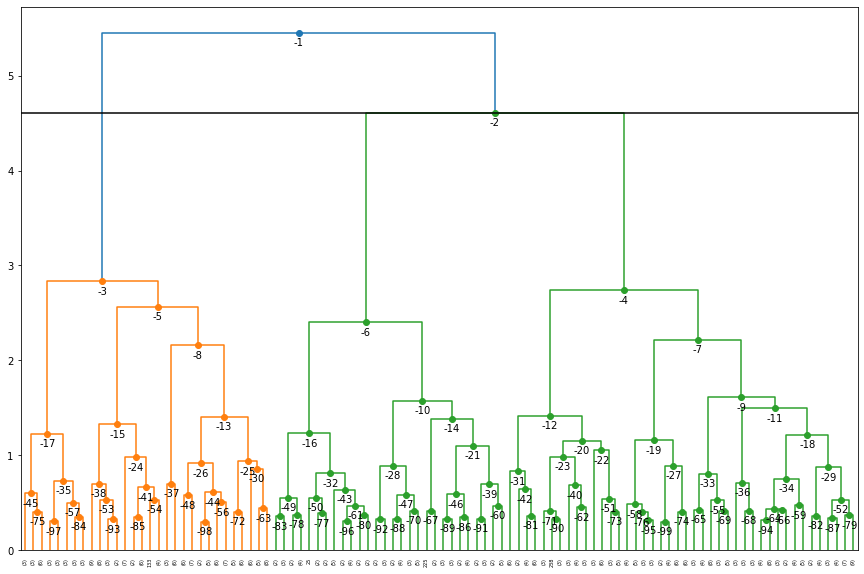

In [138]:
Z = linkage(X, metric='euclidean',method='ward')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [139]:
plot_node(Z, X.reshape(-1, 10), y, -2)

              0    1  2
Frequency:  132  114  3
Items in the cluster: 249 / 390


In [140]:
plot_node(Z, X.reshape(-1, 10), y, -3)

             0   1    2
Frequency:  18  21  102
Items in the cluster: 141 / 390


In cluster -2 there are only c-CS observations while in cluster -3 there is a strong prevalence of t-CS-s with a small proportion of c-CS ones.

This is coherent with the article's result according to which these 10 proteins allow to discriminate between t-CS-s mice, that fail in learning, and c-CS-m and c-CS-s mice, that show a learning activity.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

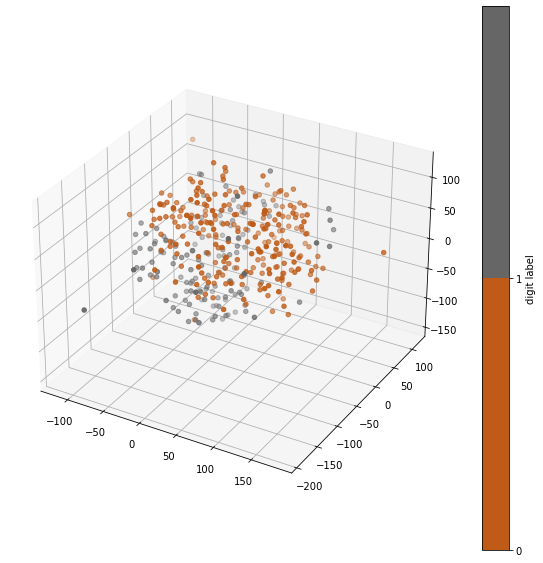

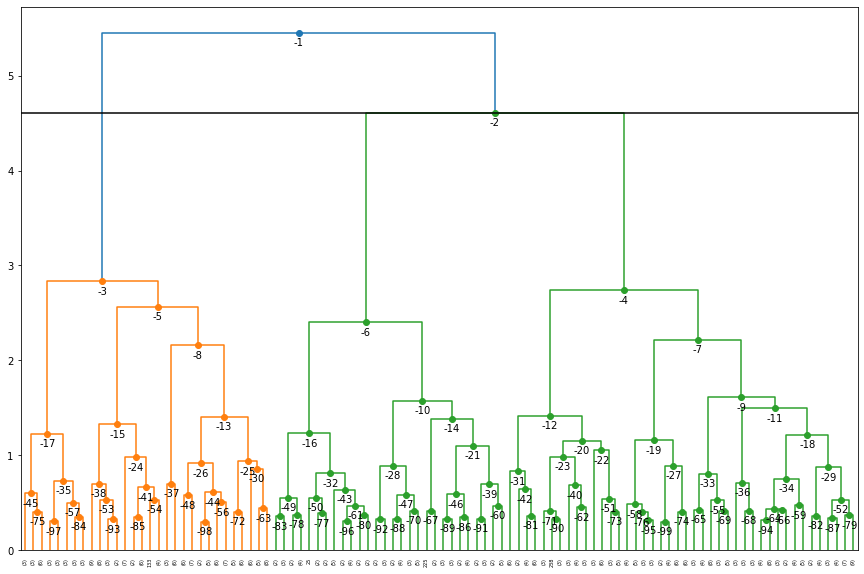

In [141]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_predict = model.fit_predict(X)
    
plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

From TSNE visualization we can see that the two clusters - one made of c-CS observations and the other mainly of t-CS-s ones - are quite distinguishable but spread.

# Evaluation

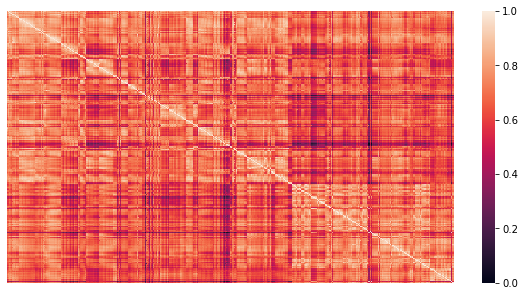

In [142]:
sim = similarity_mat(X, 'euclidean')
plot_sorted_mat(sim, y_predict)

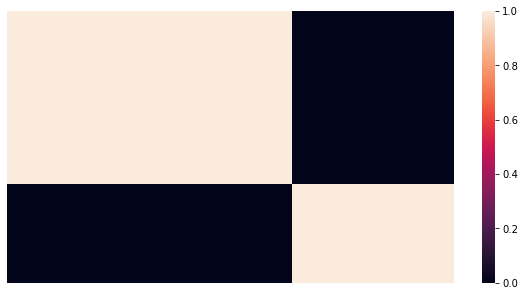

In [143]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [144]:
print('correlation =', correlation(X, y_predict, 'euclidean'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.7595859921032083
total purity = 0.5999999999678582
entropy = 0.37723099545468985
jaccard similarity = 0.21865371905028216


From these quality scores we can say that these 10 proteins help clustering the three input classes and, from the clusters' composition, that more importantly they help distinguishing between mice able to learn and those who don't.

# KMeans

In [145]:
best_nclusters_KMeans('euclidean','ward')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


In [146]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='ward')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.5179487179220732
Kmeans++ purity 0.5179487179220732
Hierarchical+Kmeans purity 0.5153846153581114


KMeans performs better using the random or k-means++ initializations.

correlation = 0.74052608856532
entropy = 0.20913058695485354
jaccard similarity = 0.18270080137937478


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


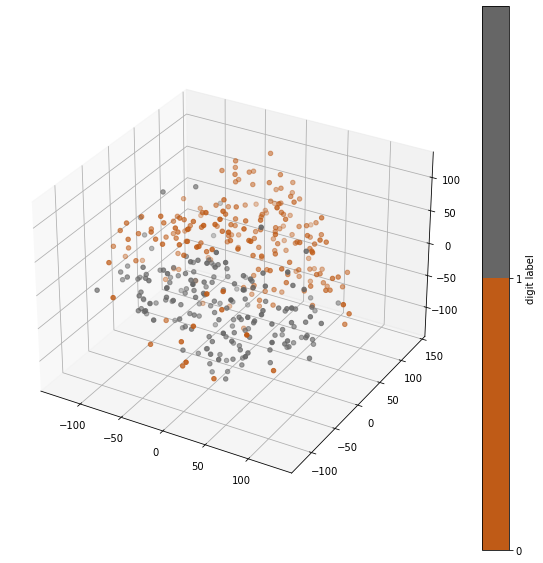

In [147]:
model = KMeans(n_clusters=2, init='random', random_state=0)     
# initialize method is how I set the first clusters: randomly or with other methods
y_predict = model.fit_predict(X)
print('correlation =', correlation(X, y_predict, 'euclidean'))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

In [148]:
cluster_composition(y,y_predict)

cluster 0 contains:
51 observations of cluster 0
54 observations of cluster 1
103 observations of cluster 2
cluster 1 contains:
99 observations of cluster 0
81 observations of cluster 1
2 observations of cluster 2


In one cluster there are only c-CS mice, in the other there are mainly t-CS-s observations while the other two groups are present in this cluster with half of t-CS-s frequency.

The result is similar to the one of hierarchical clustering but, from the different evaluation scores, KMeans performs worse than agglomerative clustering.

# DBSCAN

In [149]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.3,1.5,25), 'min_samples': range(5,10)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 0.5, 'min_samples': 5}
CV score 0.3846153846055227


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.004932      0.000652         0.002831        0.000249       0.3   
1         0.004134      0.000086         0.002583        0.000488       0.3   
2         0.004123      0.000091         0.002582        0.000491       0.3   
3         0.004133      0.000082         0.002603        0.000475       0.3   
4         0.004375      0.000344         0.002693        0.000575       0.3   
..             ...           ...              ...             ...       ...   
120       0.002051      0.000061         0.001775        0.000424       1.5   
121       0.002045      0.000059         0.001773        0.000432       1.5   
122       0.002048      0.000058         0.001774        0.000435       1.5   
123       0.002045      0.000063         0.001821        0.000468       1.5   
124       0.002059      0.000056         0.001783        0.000434       1.5   

    param_min_samples                          params  split0_test_score  \
0                   5  {'eps': 0.3, 'min_samples': 5}           0.969231   
1                   6  {'eps': 0.3, 'min_samples': 6}           0.969231   
2                   7  {'eps': 0.3, 'min_samples': 7}           0.923077   
3                   8  {'eps': 0.3, 'min_samples': 8}           0.923077   
4                   9  {'eps': 0.3, 'min_samples': 9}           0.923077   
..                ...                             ...                ...   
120                 5  {'eps': 1.5, 'min_samples': 5}           1.000000   
121                 6  {'eps': 1.5, 'min_samples': 6}           1.000000   
122                 7  {'eps': 1.5, 'min_samples': 7}           1.000000   
123                 8  {'eps': 1.5, 'min_samples': 8}           1.000000   
124                 9  {'eps': 1.5, 'min_samples': 9}           1.000000   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.830769           0.792308         0.864103        0.075977   
1             0.830769           0.792308         0.864103        0.075977   
2             0.830769           0.792308         0.848718        0.054874   
3             0.807692           0.738462         0.823077        0.076150   
4             0.784615           0.738462         0.815385        0.078446   
..                 ...                ...              ...             ...   
120           0.846154           0.807692         0.884615        0.083086   
121           0.846154           0.807692         0.884615        0.083086   
122           0.846154           0.807692         0.884615        0.083086   
123           0.846154           0.807692         0.884615        0.083086   
124           0.846154           0.807692         0.884615        0.083086   

     rank_test_score  
0                121  
1                121  
2                123  
3                124  
4                125  
..               ...  
120                1  
121                1  
122                1  
123                1  
124                1  

[125 rows x 13 columns]

DBSCAN purity 0.3846153846055227
entropy = 2.0408318985917563e-16
jaccard similarity = 0.14792899408284024
Number of outliers 0
     0
0  390


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


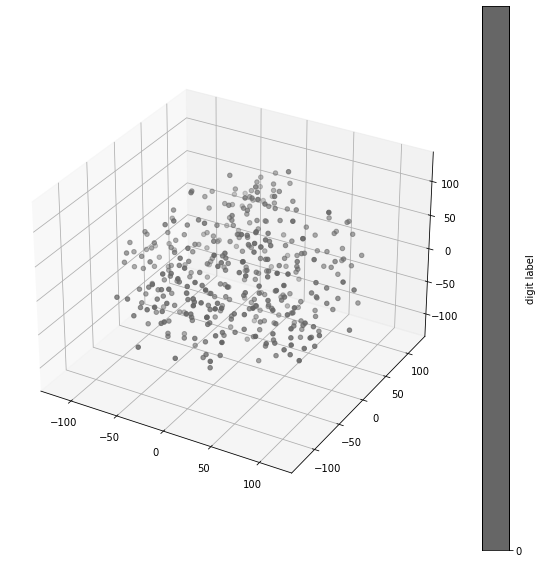

In [150]:
model = DBSCAN(eps=0.5, min_samples=5)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']

plot3d(X, labels=y_predict) 

DBSCAN doesn't perform well as in all the other analysis.

## Clustering of t-CS-m (rescued learning) with the two classes of successful learning in control mice - c-CS-m and c-CS-s - with a subset of 10 proteins

In [151]:
# extract the expression values only of the three classes of interest
index = []
for cl in [2, 3, 5, 6, 7]:
    index = index + df[df['class'] == cl].index.to_list()
    
df_mix2 = df.drop(index)
    
df_mix2.shape

(420, 78)

In [152]:
df_mix2.index = range(420)

I replace the class identification of the three classes of interest - 0, 1 and 4 - with the numbers from 0 to 2 to make easier the computations of the evaluation scores:

- c-CS-m -> 0
- c-CS-s -> 1
- t-CS-m -> 2

In [153]:
df_mix2['class'] = df_mix2['class'].replace([0,1,4],range(3))

In [154]:
ten_proteins = ['pNR1_N', 'APP_N', 'MTOR_N', 'P38_N', 'NR2B_N', 'RAPTOR_N', 'S6_N', 'Tau_N', 'GluR3_N', 'EGR1_N']

not_wanted = [prot for prot in columns if prot not in ten_proteins]

df_mix_reduced2 = df_mix2.drop(not_wanted, axis=1)

df_mix_reduced2.shape

(420, 11)

In [155]:
# extract the expression values of each protein in all the mice
X = df_mix_reduced2.drop(['class'], axis=1).to_numpy()
# extract the classes
y = df_mix_reduced2['class']

print('X shape =', X.shape)
print('y shape =', y.shape)

X shape = (420, 10)
y shape = (420,)


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


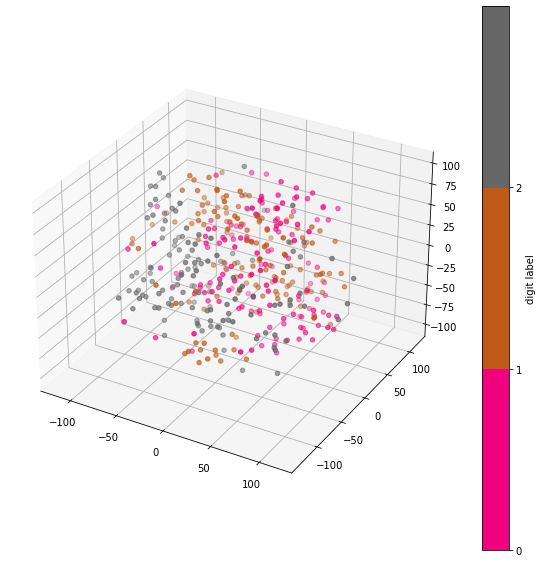

In [156]:
plot3d(X, labels=y)

From TSNE visualization we can see that the observations of the three classes - t-CS-m, c-CS-s and c-CS-m - are all mixed, as expected.

# Hierachical clustering by building the Linkage Matrix

In [157]:
best_distance_metric()

euclidean
best number of clusters: 2
correlation = 0.8773831812566446
total purity = 0.426190476166511

cityblock
best number of clusters: 2
correlation = 0.8291777454333392
total purity = 0.4047619047408019

correlation
best number of clusters: 2
correlation = 0.8135803183187699
total purity = 0.4285714285504117

minkowski
best number of clusters: 2
correlation = 0.8792547450787297
total purity = 0.4023809523597643



The best metric is correlation, according to which there are 2 clusters.

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

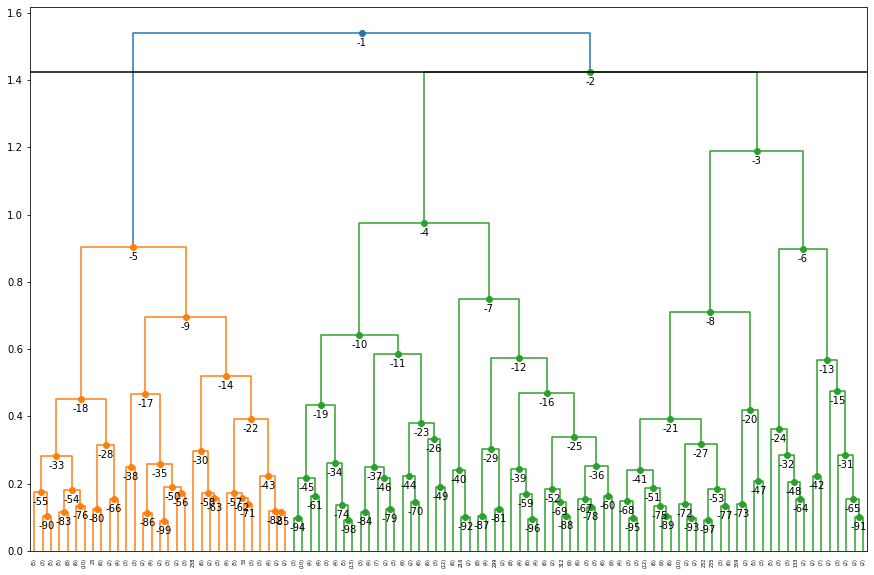

In [158]:
Z = linkage(X, metric='correlation',method='complete')

plot_dendrogram(Z=Z, X=X,
                truncate_mode='lastp', 
                p=100, n_clusters=2)

In [159]:
plot_node(Z, X.reshape(-1, 10), y, -2)

             0   1    2
Frequency:  98  82  127
Items in the cluster: 307 / 420


In [160]:
plot_node(Z, X.reshape(-1, 10), y, -5)

             0   1  2
Frequency:  52  53  8
Items in the cluster: 113 / 420


In cluster -2 there are mainly observations of t-CS-m class but also a lot of c-CS ones, while in cluster -5 there are more c-CS samples.

This is coherent with the article's result according to which memantine allows to recover the learning ability and so the 10 proteins don't allow to discriminate between t-CS-m mice, with rescued learning, and c-CS-m and c-CS-s mice, that are able to learn. Consequently the observations of these three different classes are all mixed.

# Hierachical clustering by using sklearn Agglomerative Clustering algorithm

/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

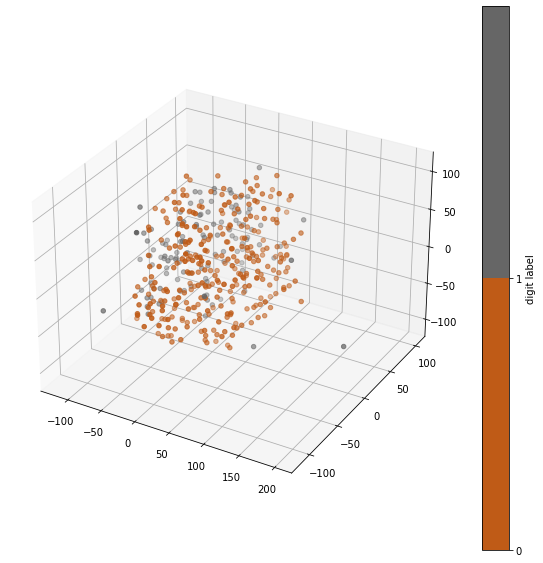

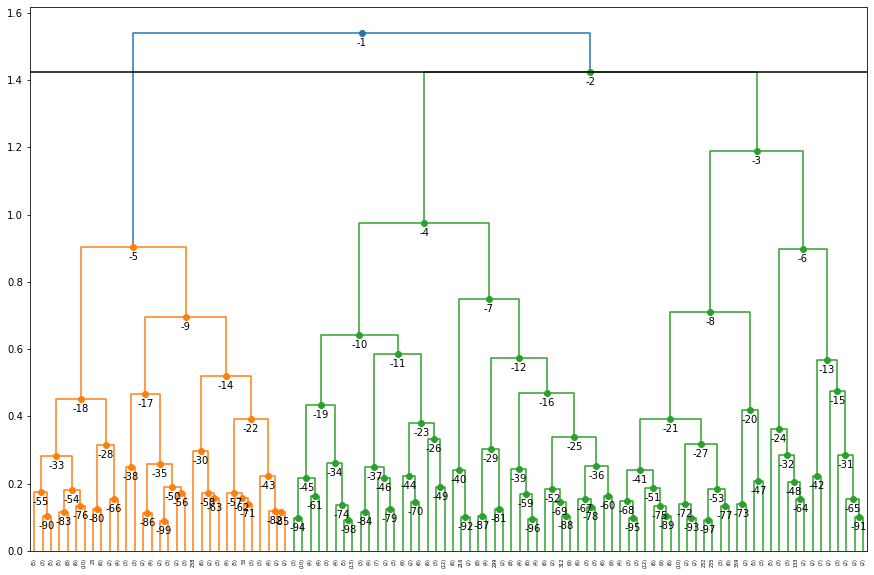

In [161]:
model = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='complete')

y_predict = model.fit_predict(X)
    
plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=2, 
                color_threshold=distance_threshold)

From these two plots we can see that there are two clusters that are not too much mixed but spread. The bigger cluster contains the c-CS observations - so the mice with learning activity - and almost all t-CS-m mice - with rescued learning that we expect to not be too much different from c-CS mice in terms of protein expressions -, while the smaller contains c-CS observations that are more different from t-CS-m ones.

# Evaluation

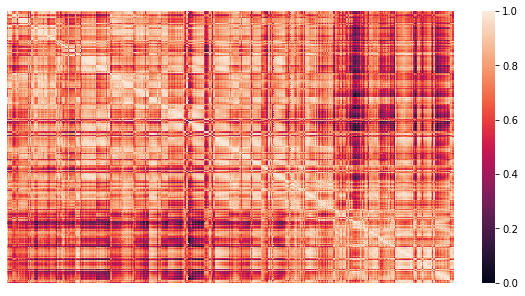

In [162]:
sim = similarity_mat(X, 'correlation')
plot_sorted_mat(sim, y_predict)

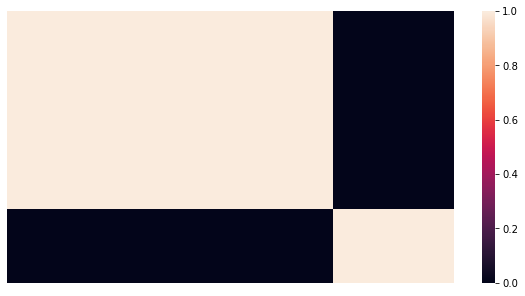

In [163]:
inc = incidence_mat(y_predict)
plot_sorted_mat(inc, y_predict)

In [164]:
print('correlation =', correlation(X, y_predict, 'correlation'))
print('total purity =', tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

correlation = 0.8135803183187699
total purity = 0.4285714285504117
entropy = 0.07644867299297044
jaccard similarity = 0.1848556735743365


Correlation is very high, total purity and entropy are not so high while jaccard similarity is one of the highest obtained even if it is anyway rather low.

From this result it seems that this subset of 10 proteins doesn't have a very different expression profile in trisomic mice with rescued learning with respect to the control ones with normal learning, in fact it is not possible to cluster apart the three classes basing on their expression profile of these proteins.

# KMeans

In [165]:
best_nclusters_KMeans('correlation','complete')

best number of clusters with random init: 2
best number of clusters with k-means++ init: 2
best number of clusters with Hierarchical+Kmeans init: 2


In [166]:
# Random
model = KMeans(n_clusters=2, init='random', random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=2, init='k-means++', random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=2, 
                                 distance_threshold=distance_threshold, 
                                 affinity='correlation', linkage='complete')
y_predict = hmodel.fit_predict(X)
centroids = np.stack([X[y_predict==k].mean(0) for k in range(2)])
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

Random Kmeans purity 0.42857142855051655
Kmeans++ purity 0.4285714285504568
Hierarchical+Kmeans purity 0.42857142855009556


KMeans performance is the same indipendently of the initialization method.

correlation = 0.7765078197383991
entropy = 0.041485765365038466
jaccard similarity = 0.18597803673332375


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


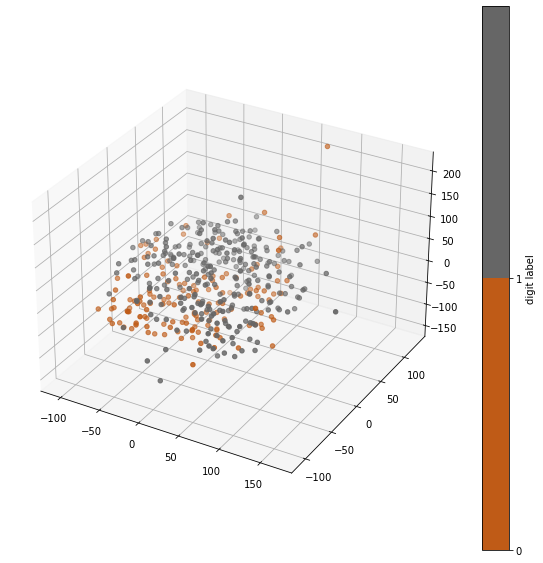

In [167]:
model = KMeans(n_clusters=2, init='random', random_state=0)     
# initialize method is how I set the first clusters: randomly or with other methods
y_predict = model.fit_predict(X)
print('correlation =', correlation(X, y_predict, 'correlation'))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

plot3d(X, labels=y_predict)

In [168]:
cluster_composition(y,y_predict)

cluster 0 contains:
67 observations of cluster 0
53 observations of cluster 1
22 observations of cluster 2
cluster 1 contains:
83 observations of cluster 0
82 observations of cluster 1
113 observations of cluster 2


In one cluster there are mainly observations of t-CS-m class but also a lot of c-CS ones, while in the other one there are more c-CS samples.

The result of KMeans algorithm is similar to the result of hierarchical clustering: both considering the clusters' composition and the different quality scores.

The fact that the algorithms are not able to clearly distinguish the observations in the three classes we know they come from means that mice of these classes don't differ significantly in protein expression.

# DBSCAN

In [169]:
# for each hyperparameters combination we compute the clustering purity
model = DBSCAN()
params = {'eps': np.linspace(0.3,1.5,25), 'min_samples': range(5,10)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

# select the hyperparameters combination that maximizes the clustering purity

print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

{'eps': 0.5, 'min_samples': 5}
CV score 0.35714285713435373


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eps  \
0         0.005786      0.000862         0.003136        0.000335       0.3   
1         0.004633      0.000073         0.002854        0.000494       0.3   
2         0.004684      0.000138         0.002782        0.000492       0.3   
3         0.004604      0.000032         0.002783        0.000471       0.3   
4         0.004667      0.000165         0.002867        0.000606       0.3   
..             ...           ...              ...             ...       ...   
120       0.002158      0.000115         0.001915        0.000471       1.5   
121       0.002144      0.000135         0.001910        0.000462       1.5   
122       0.002111      0.000067         0.001855        0.000404       1.5   
123       0.002157      0.000065         0.001963        0.000463       1.5   
124       0.002130      0.000090         0.001892        0.000425       1.5   

    param_min_samples                          params  split0_test_score  \
0                   5  {'eps': 0.3, 'min_samples': 5}           0.964286   
1                   6  {'eps': 0.3, 'min_samples': 6}           0.964286   
2                   7  {'eps': 0.3, 'min_samples': 7}           0.921429   
3                   8  {'eps': 0.3, 'min_samples': 8}           0.921429   
4                   9  {'eps': 0.3, 'min_samples': 9}           0.921429   
..                ...                             ...                ...   
120                 5  {'eps': 1.5, 'min_samples': 5}           1.000000   
121                 6  {'eps': 1.5, 'min_samples': 6}           1.000000   
122                 7  {'eps': 1.5, 'min_samples': 7}           1.000000   
123                 8  {'eps': 1.5, 'min_samples': 8}           1.000000   
124                 9  {'eps': 1.5, 'min_samples': 9}           1.000000   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             0.914286           0.957143         0.945238        0.022080   
1             0.914286           0.957143         0.945238        0.022080   
2             0.914286           0.957143         0.930952        0.018748   
3             0.900000           0.950000         0.923810        0.020482   
4             0.878571           0.950000         0.916667        0.029354   
..                 ...                ...              ...             ...   
120           0.928571           0.964286         0.964286        0.029161   
121           0.928571           0.964286         0.964286        0.029161   
122           0.928571           0.964286         0.964286        0.029161   
123           0.928571           0.964286         0.964286        0.029161   
124           0.928571           0.964286         0.964286        0.029161   

     rank_test_score  
0                121  
1                121  
2                123  
3                124  
4                125  
..               ...  
120                1  
121                1  
122                1  
123                1  
124                1  

[125 rows x 13 columns]

DBSCAN purity 0.35714285713435373
entropy = 0.0
jaccard similarity = 0.12755102040816327
Number of outliers 0
     0
0  420


/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/paolamaragno/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


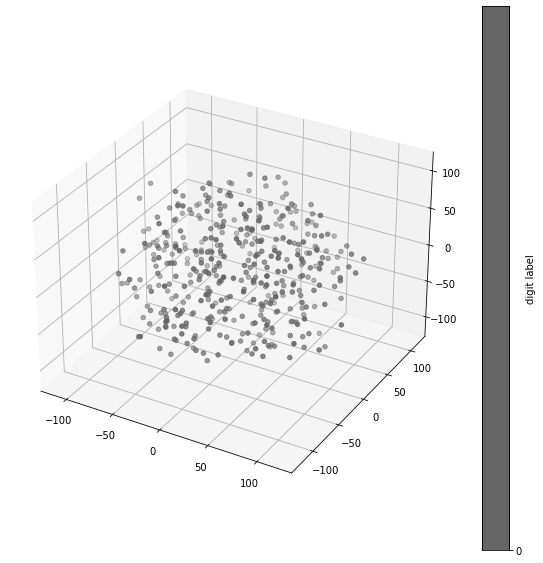

In [170]:
model = DBSCAN(eps=0.5, min_samples=5)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))
print('entropy =', v_measure_score(y, y_predict))
print('jaccard similarity =', jaccard_score(y, y_predict, average='weighted'))

print("Number of outliers", (y_predict == -1).sum()) # outliers in dbscan are identified by -1 predicted class
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1,-1), columns=ids)) # eventually index=['']


plot3d(X, labels=y_predict) 

This is the case in which DBSCAN returns the best result in terms of total purity and of jaccard similarity score: this can be explained by the fact that this is the only case in which we expect mice of the three different classes under analysis to be not distinguishable using this subset of proteins.

# -------------------------------------------------------------------------------------------
Eventually in the article is reported the result of clustering with c-SC and t-SC classes using a subset of 21 proteins able to discriminate between t-SC-s and the other classes.

All t-SC-s mice result present in a single cluster separated from the rest of the classes: these 21 proteins differentiate between trisomic mice that are incapable of learning successfully and the three classes of mice that are capable of learning with stimulation.

I avoided to report also this analysis.

# Conclusion

By the end of the whole analysis I can say that from none of them I obtained very good evaluation scores.
I think this is because even if mice are classified differently, lot of them actually show the same learning activity and so very probably they have a similar expression profile that don't allow the clustering algorithm to distinguish all the classes under analysis in that moment. 
For this reason, in the previous analysis, I decided to give more importance to highlight which classes were clustered in each cluster rather than the quality scores.

When the clustering is performed on all eight classes hierarchical clustering and KMeans are able to catch the difference between stimulated mice and those who weren't, even if this discrimination is only light and not sharp. 

When trying to clustering the four classes of control mice, hierarchical clustering and KMeans are able to better discriminate among stimulated or not mice - and so those with learning activity or not - even if they are not able to distinguish all the four input classes and this is the reason while the scores remain low.
Notice that this ability of both the algorithms improves significantly when considering only a subset of proteins that we know to be differentially expressed among mice with learning activity and those without.

When considering the four classes of trisomic mice and the protein expression levels of all 77 proteins KMeans and hierarchical clustering were both able to discriminate between stimulated and not stimulated mice - even if not perfectly - but they were incapable of clustering apart the only trisomic class with rescued learning activity. 
Considering only a subset of proteins - that we know to be differentially expressed among trisomic mice with learning activity and those without - hierarchical clustering resulted better in discriminating t-CS and t-SC classes but it was not able to cluster apart neither the two t-SC groups nor the t-CS-m mice, the only with learning ability. While KMeans was better in discriminating among the two t-SC classes.

Hierarchical clustering is very good in discriminating the two classes of control mice stimulated to learn from the trisomic class stimulated but treated with saline - that consequently fails in learning - using a subset of proteins that significantly differ in expression between c-CS mice and t-CS-s ones.

Eventually, both KMeans and hierarchical clustering are not able to clearly distinguish the observations in the three classes of c-CS mice and t-CS-m ones - with rescued learning. This makes sense from a biological point of view since, having the same learning ability, we expect them to express proteins in a similar way and so to be not clusterizable according to their protein expression profile.

In all these analysis DBSCAN poorly performed in clustering the different classes with respect to the other two clustering algorithms. This is an evidence of the fact that our data can be used to discriminate between mice with learning activity or not only by computing the distance of their protein expression profile and not using density and connectivity concepts.